# Машинное обучение, ЭФ МГУ

## Практическое задание 3. Линейные методы классификации. 

### О задании

В этом задании вы:
- ознакомитесь с тем, что происходит "внутри" метода опорных векторов и логистической регрессии
- познакомитесь с калибровкой вероятности
- изучите методы трансформации переменных и методы отбора признаков
- попробуете оценить экономический эффект модели

In [1]:
from tqdm.notebook import tqdm
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [2]:
matplotlib.rcParams['figure.figsize'] = (8, 8)
sns.set_style('whitegrid')

In [3]:
# пропишите путь до папки c данными:
DATA_PATH = '/Users/sergeypetrakov/Documents/Многомерный статистический анализ/3 прак/Linear methods/data'

# Часть 0. SVM, LR и калибровка вероятностей. 

Сгенерируем синтетические данные.

In [4]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(
    n_samples=10000, n_features=10, n_informative=5, n_redundant=5,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

__Задание 1.__ Обучение и применение метода опорных векторов и логистической регрессии.

__(1 балл)__

Обучите метод опорных векторов. На занятиях мы проходили линейный вариант без ядрового перехода, что соответствует линейному ядру (`LinearSVC` или же `SVC(kernel='linear')` в `sklearn.svm`). Подберите параметр регуляризации `C` (можете воспользоваться кросс-валидацией или отделить валидационную выборку от обучающей). 

## SVM

In [5]:
#your code here
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import cross_val_score, KFold

results = []
for C in [0.1, 1, 10, 100]:
    results.append(cross_val_score(SVC(kernel='linear', C=C), X_train, y_train, cv=3).mean())
results
C = [0.1, 1, 10, 100][np.argmax(results)]

На тестовой части посчитайте AUC-ROC, AUC-PR с точностью до 5 знаков. Постройте ROC и PR кривые, сравните их с ответами случайного классификатора. Заметим, что с помощью `sklearn` можно посчитать обе метрики двумя разными способами - в чем их различия? Сравните результаты. 

Значения AUC_ROC:0.77514, 0.77514, Значения AUC_PR:0.83369, 0.81525


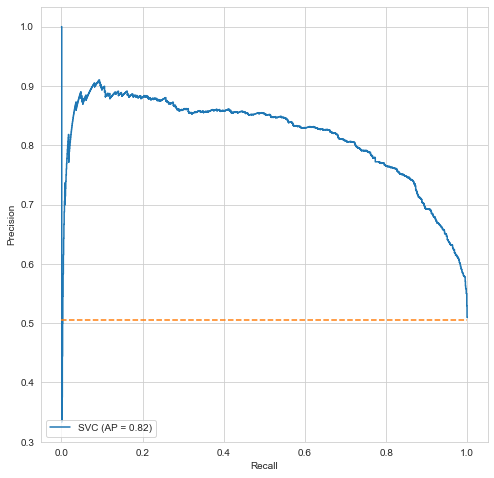

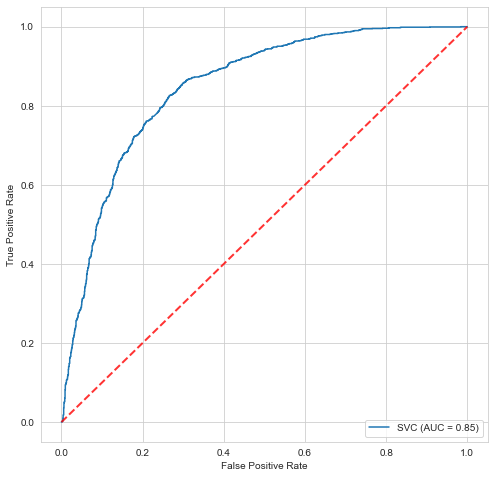

In [9]:
#your code here
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, auc, average_precision_score, plot_roc_curve, plot_precision_recall_curve

svm = SVC(kernel='linear', C=C, probability=True)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

#AUC_ROC
#1
AUC_ROC_1 = np.round(roc_auc_score(y_test, y_pred), 5)

#2
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
AUC_ROC_2 = np.round(auc(fpr, tpr), 5)


#AUC_PR
#1
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
AUC_PR_1 = np.round(auc(recall, precision),5)

#2
AUC_PR_2 = np.round(average_precision_score(y_test, svm.predict_proba(X_test)[:,1]), 5)


print('Значения AUC_ROC:{}, {}, Значения AUC_PR:{}, {}'.format(AUC_ROC_1, AUC_ROC_2, AUC_PR_1, AUC_PR_2))
# ROC and PR curves
no_skill = len(y_test[y_test==1]) / len(y_test)

disp = plot_precision_recall_curve(svm, X_test, y_test);
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill');

plot_roc_curve(svm, X_test, y_test);
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8);
# Ответы случайного классификатора изображаются сплошной линией в
# координатах precision, recall и FPR, TPR. Таким образом можно сказать, что 
# наша модель перформит лучше случайного классификатора
#

А теперь проделайте все то же самое для логистической регрессии (LR) — обучение, подбор параметра регуляризации (используйте L2-регуляризацию), вычисление всех метрик и построение кривых. Сравните результаты LR и SVM с точки зрения всех вычисленных критериев качества, объясните различия (если они есть).

## Logistic regression

Значения AUC_ROC:0.77202, 0.77202, Значения AUC_PR:0.83167, 0.82993


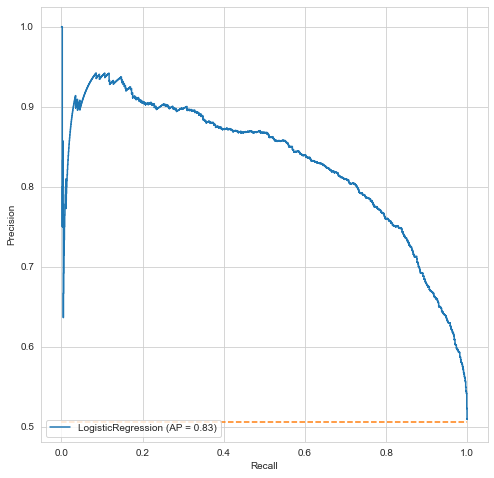

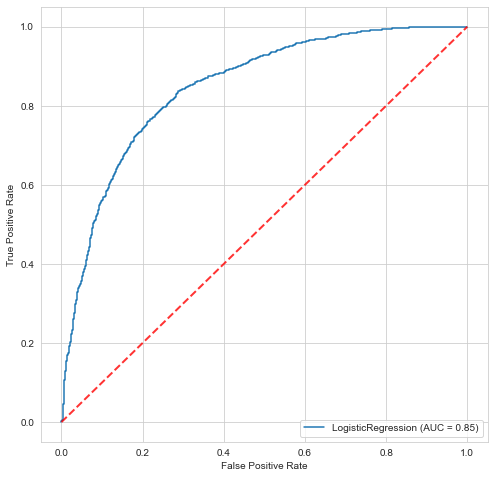

In [10]:
#your code here
from sklearn.linear_model import LogisticRegression

results_lr = []
for C in [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]:
    results_lr.append(cross_val_score(LogisticRegression(C=C), X_train, y_train, cv=5).mean())

C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000][np.argmax(results_lr)]

model = LogisticRegression(C=C)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#AUC_ROC
#1
AUC_ROC_1 = np.round(roc_auc_score(y_test, y_pred), 5)

#2
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
AUC_ROC_2 = np.round(auc(fpr, tpr), 5)


#AUC_PR
#1
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
AUC_PR_1 = np.round(auc(recall, precision),5)

#2
AUC_PR_2 = np.round(average_precision_score(y_test, model.predict_proba(X_test)[:,1]), 5)


print('Значения AUC_ROC:{}, {}, Значения AUC_PR:{}, {}'.format(AUC_ROC_1, AUC_ROC_2, AUC_PR_1, AUC_PR_2))
# ROC and PR curves
no_skill = len(y_test[y_test==1]) / len(y_test)

disp = plot_precision_recall_curve(model, X_test, y_test);
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill');

plot_roc_curve(model, X_test, y_test);
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8);
# Ответы случайного классификатора изображаются сплошной линией в
# координатах precision, recall и FPR, TPR. Таким образом можно сказать, что 
# наша модель перформит лучше случайного классификатора

Сравнение моделей: 
С точки зрения ROC_AUC и PR_AUC результаты LR и SVM получились довольно похожими. В 3 из 4 показателей разница 
начинается с 3 знака посе запятой, что говорит о схожести результатов. Форма кривых также сопоставима.

В названии метода опорных векторов присутствуют некоторые "опорные векторы". Сгенерируйте синтетический датасет с помощью `make_classification` с 2 признаками, обучите на нём метод опорных векторов. Визуализируйте разделяющую прямую, все объекты и выделите опорные вектора (атрибут `support_vectors_`). В этот раз, если необходимо, вместо `LinearSVC` воспользуйтесь `SVC(kernel='linear')`, так как только в нём есть информация об опорных векторах.

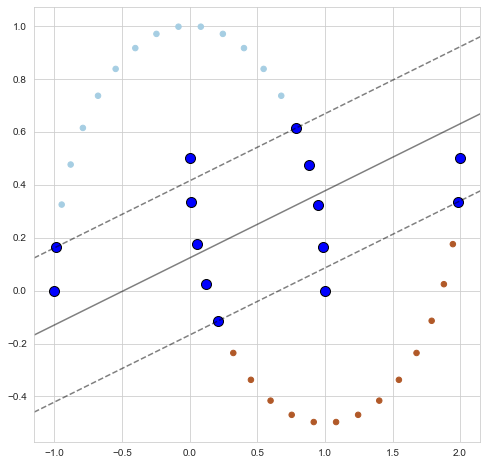

In [12]:
from sklearn.datasets import make_moons
# we create 40 separable points
X, y = make_moons(n_samples=40, random_state=42)

# fit the model, don't regularize for illustration purposes
clf = SVC(kernel='linear', C=100)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors using blue colour
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k', c = 'blue')
plt.show()

В отличие от метода опорных векторов, логистическая регрессия не пытается построить разделяющую гиперплоскость, а приближает в каждой точке пространства объектов правдоподобие положительных ответов $p(y=+1|x)$. Попробуйте нарисовать это распределение на плоскости, не забудьте отметить на ней все объекты. Вам может помочь функция `plot_2d_separator` (реализованная ниже).

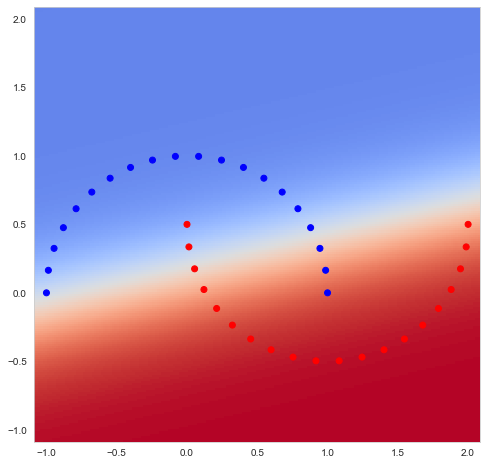

In [13]:
clf = LogisticRegression(C=100)
clf.fit(X,y)

def plot_2d_separator(clf: object, X: np.array, y: np.array=None, draw_points: bool=True, **kwargs):
    min_x, max_x, min_y, max_y = (
        np.min(X[:, 0]), np.max(X[:, 0]), np.min(X[:, 1]), np.max(X[:, 1])
    )
    std_x, std_y = np.std(X[:, 0]), np.std(X[:, 1])
    x, y_ = np.meshgrid(
        np.linspace(min_x - 0.1*std_x, max_x + 0.1*std_x, 200), 
        np.linspace(min_x - 0.1*std_x, max_x + 0.1*std_x, 200)
    )
    z = np.zeros_like(x)
    if hasattr(clf, 'predict_proba'):
        for i in tqdm(range(x.shape[0])):
            for j in range(x.shape[1]):
                z[i, j] = clf.predict_proba([[x[i, j], y_[i, j]]])[:, 1].item()
    else:
        for i in tqdm(range(x.shape[0])):
            for j in range(x.shape[1]):
                z[i, j] = clf.decision_function([[x[i, j], y_[i, j]]]).item()
    z = z[:-1, :-1]
    z -= z.mean() # чтобы было 2 цвета
    z_min, z_max = -np.abs(z).max(), np.abs(z).max()
    plt.pcolor(x, y_, z, cmap='coolwarm', vmin=z_min, vmax=z_max);
    if draw_points:
        if y is None:
            plt.scatter(X[:, 0], X[:, 1], **kwargs);
        else:
            if 'color' in kwargs:
                del kwargs['color']
            plt.scatter(X[:, 0], X[:, 1], color=np.array(['blue', 'red'])[y], **kwargs);

plot_2d_separator(clf, X, y)

            

__Задание 2.__ Калибровка вероятностей.

__(1 балл)__

Перейдём к оценке качества выдаваемых алгоритмами вероятностей. Начнём с калибровочных кривых. 

Допустим, алгоритм возвращает некоторые числа от нуля до единицы. Хорошо ли они оценивают вероятность? Для этого разобьем отрезок $[0, 1]$ на несколько маленьких отрезков одинаковой длины. Рассмотрим $i$-й отрезок с границами $[a_i, b_i]$ и предсказания $p_1, p_2, \dots, p_k$, которые попали в него. Пусть им соответствуют истинные ответы $y_1, y_2, \dots, y_k$. Если алгоритм выдает корректные вероятности, то среди этих истинных ответов должно быть примерно $(a_i + b_i) / 2$ единиц. Иными словами, если нарисовать кривую, у которой по оси X отложены центры отрезков, а по оси Y — доли единичных ответов этих в отрезках, то она должна оказаться диагональной. Ниже приведена функция, которая должна рисовать такие кривые. В ней допущено две ошибки — найдите и исправьте их.

Text(0.5, 1.0, 'SVC')

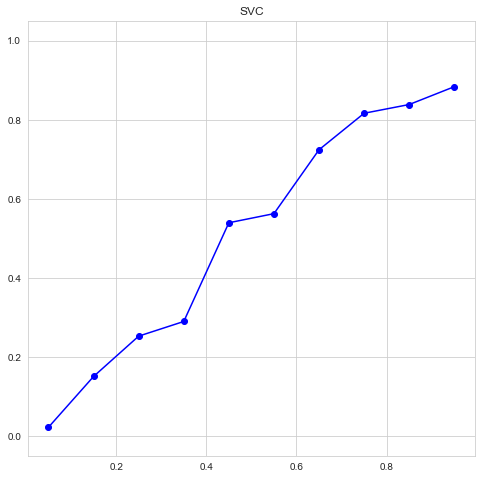

In [16]:
clf = SVC(kernel='linear', C=100, probability=True, random_state=42)
clf.fit(X_train,y_train)
y_pred = clf.predict_proba(X_test)[:,1]

def plot_calibration_curve(y_test, preds, label: str=None, color: str='blue'):
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 10
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        bin_middle_points.append((r + l) / 2) 
        bin_real_ratios.append(np.mean(y_test[(preds >= l) & (preds < r)] == 1)) 
    plt.plot(bin_middle_points, bin_real_ratios, label=label, color=color)
    plt.scatter(bin_middle_points, bin_real_ratios, color=color)
    if label is not None:
        plt.legend(fontsize=13);
    plt.ylim([-0.05, 1.05])
    plt.grid(True)
    
plot_calibration_curve(y_test, y_pred)
plt.title('SVC')

Text(0.5, 1.0, 'Logistic Regression')

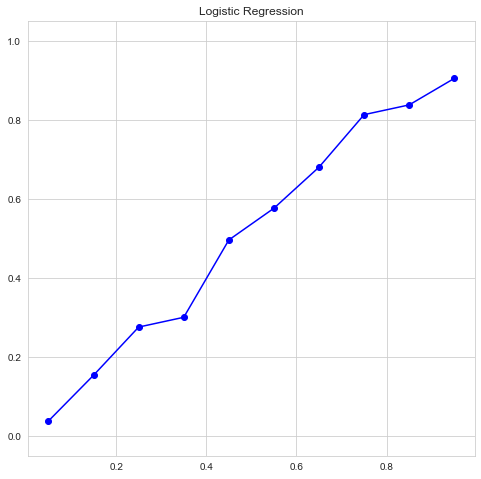

In [17]:
clf = LogisticRegression(C=1, random_state=42)
clf.fit(X_train,y_train)
y_pred = clf.predict_proba(X_test)[:,1]
    
plot_calibration_curve(y_test, y_pred)
plt.title('Logistic Regression')

Сгенерируйте синтетический датасет аналогично использованному в самом первом задании. Постройте калибровочные кривые на тестовой части для логистической регрессии и метода опорных векторов (не забудьте перевести его предсказания в $[0;1]$). Изучите распределение ответов классификаторов (постройте гистограммы, например можете использовать `plt.hist` или `sns.distplot`). Чем они различаются? Чем вы можете объяснить это?

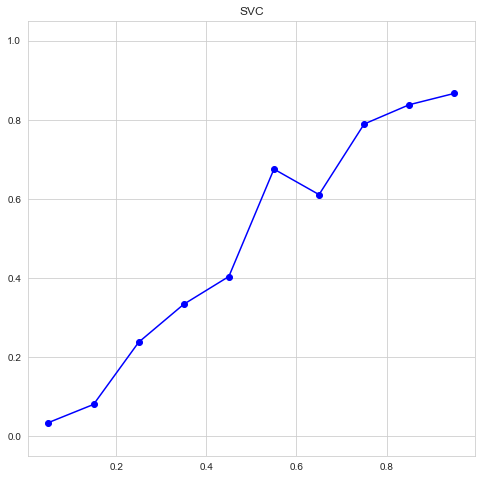

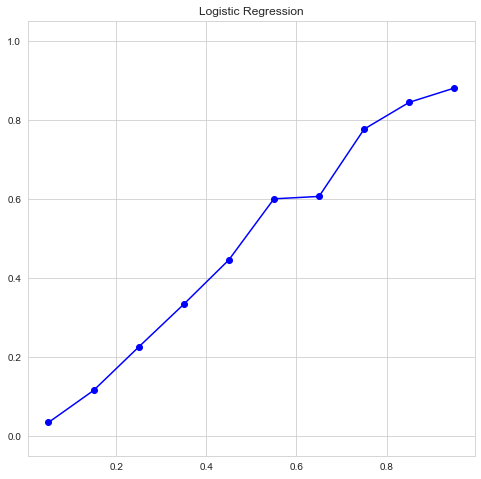

In [22]:
#your code here

X, y = make_classification(
    n_samples=5000, n_features=10, n_informative=5, n_redundant=5,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)


# SVC
clf = SVC(kernel='linear', C=100, probability=True, random_state=42)
clf.fit(X_train,y_train)
y_pred = clf.predict_proba(X_test)[:,1]
plot_calibration_curve(y_test, y_pred)
plt.title('SVC')
plt.show()

# LogisticRegression
clf = LogisticRegression(C=1, random_state=42)
clf.fit(X_train,y_train)
y_pred = clf.predict_proba(X_test)[:,1] 
plot_calibration_curve(y_test, y_pred)
plt.title('Logistic Regression')
plt.show()

Они различаются волатильностью результатов. Логистическая регрессия менее волатильна и ближе к y=x,
что символизирует о лучших результатах

Воспользуйтесь `CalibratedClassifierCV` из `sklearn` для калибровки вероятностей метода опорных векторов на обучении и постройте с его помощью предсказания для тестовой выборки. Нарисуйте для них калибровочную кривую. Улучшилась ли она?

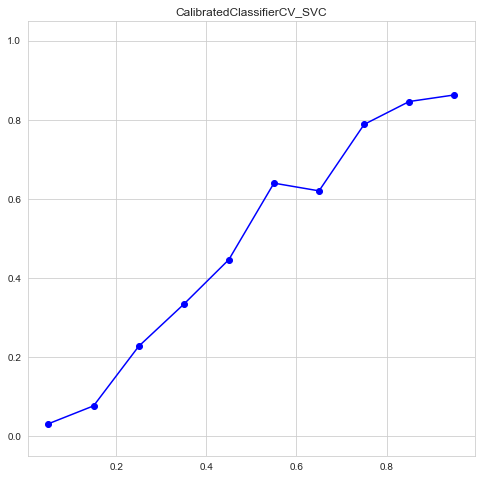

In [25]:
# your code here
from sklearn.calibration import CalibratedClassifierCV

cclas = CalibratedClassifierCV(SVC(kernel='linear', C=100, probability=True, random_state=42))
cclas.fit(X_train,y_train)
y_pred = cclas.predict_proba(X_test)[:,1]
plot_calibration_curve(y_test, y_pred)
plt.title('CalibratedClassifierCV_SVC')
plt.show()

Как можно заметить линия стала более гладкой, что свидетельствует об улучшении результата.

__Бонусное задание (0.5 балла).__ Реализуйте свою функцию для калибровки вероятностей. Опишите ваш подход и продемонстрируйте результаты. Ключевые слова для вдохновения: `Platt`, `Isotonic`.

In [11]:
#your code here
from ssklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
def calibrate_probs(algorithms, X_train, X_test, y_train, y_test)
    clf = algorithms[0](random_state=42)
    clf.fit(X_train,y_train)
    clf_1 = algorithms[1](random_state=42)
    clf_1.fit(X_train,y_train)
    clf_2 = algorithms[2](random_state=42)
    clf_2.fit(X_train,y_train)
    clf_3 = algorithms[3](random_state=42)
    clf_3.fit(X_train,y_train)
    y_pred = clf.predict_proba(X_test)[:,1] 
    y_pred_1 = clf_1.predict_proba(X_test)[:,1] 
    y_pred_2 = clf_2.predict_proba(X_test)[:,1] 
    y_pred_3 = clf_3.predict_proba(X_test)[:,1] 
    plot_calibration_curve(y_test, (y_pred+y_pred_1+y_pred_2+y_pred_3))
    plt.title('ansamble')
    plt.show()
    
calibrate_probs([LogisticRegression(), RandomForestClassifier(), SVC(), GaussianNB()], X_train, X_test, y_train, y_test)  

# Часть 1. Работа с переменными.

В этой части мы научимся обрабатывать категориальные переменные, так как закодировать их в виде чисел недостаточно (это задаёт некоторый порядок, которого на категориальных переменных может и не быть). Существует два основных способа обработки категориальных значений:
- One-hot-кодирование
- Счётчики (CTR, mean-target кодирование, ...) — каждый категориальный признак заменяется на среднее значение целевой переменной по всем объектам, имеющим одинаковое значение в этом признаке.

Начнём с one-hot-кодирования. Допустим наш категориальный признак $f_j(x)$ принимает значения из множества $C=\{c_1, \dots, c_m\}$. Заменим его на $m$ бинарных признаков $b_1(x), \dots, b_m(x)$, каждый из которых является индикатором одного из возможных категориальных значений:
$$
b_i(x) = [f_j(x) = c_i]
$$

__Подготовка данных.__

Загрузим данные [UCI Bank Marketing Dataset](https://archive.ics.uci.edu/ml/datasets/bank+marketing). Этот датасет содержит информацию о банковском телефонном маркетинге, объектом в нем является телефонный звонок потенциальному клиенту с предложением некоторой услуги (утверждается, что это краткосрочный депозит), целевой переменной - ответ клиента (согласился ли он открыть депозит?). В качестве признакового описания используются характеристики клиента (образование, брак и т.д.), данные о звонке и различные экономические индикаторы - более подробная информация представлена в файле `bank-additional-names.txt`.

In [26]:
df = pd.read_csv(f'{DATA_PATH}/bank-additional-full.csv', sep=';')
df.drop(['duration'], axis=1, inplace=True)

In [27]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


__age__ (numeric)

__job__ : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

__marital__ : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

__education__ (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

__default__: has credit in default? (categorical: "no","yes","unknown")

__housing__: has housing loan? (categorical: "no","yes","unknown")

__loan__: has personal loan? (categorical: "no","yes","unknown")
### related with the last contact of the current campaign:
__contact__: contact communication type (categorical: "cellular","telephone") 

__month__: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

__day_of_week__: last contact day of the week (categorical: "mon","tue","wed","thu","fri")

__duration__: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
### other attributes:
__campaign__: number of contacts performed during this campaign and for this client (numeric, includes last contact)

__pdays__: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

__previous__: number of contacts performed before this campaign and for this client (numeric)

__poutcome__: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
### social and economic context attributes
__emp.var.rate__: employment variation rate - quarterly indicator (numeric)

__cons.price.idx__: consumer price index - monthly indicator (numeric)     
__cons.conf.idx__: consumer confidence index - monthly indicator (numeric)     
__euribor3m__: euribor 3 month rate - daily indicator (numeric)

__nr.employed__: number of employees - quarterly indicator (numeric)

### Output variable (desired target):

__y__ - has the client subscribed a term deposit? (binary: "yes","no")

__Задание 3 (0.5 балла).__ Разделите выборку на обучающую и тестовую в соотношении 3:1. Зафиксируйте `random_state=777`, также используйте `stratify`. 

In [29]:
#your code here
from sklearn.model_selection import train_test_split
RANDOM_STATE = 777
df_train, df_test = train_test_split(df, test_size=0.25, stratify=df['y'].values, random_state=RANDOM_STATE)
y_train = (df_train['y'].values == 'yes').astype(int)
y_test = (df_test['y'].values == 'yes').astype(int)
print(df_train.shape, df_test.shape)

(30891, 20) (10297, 20)


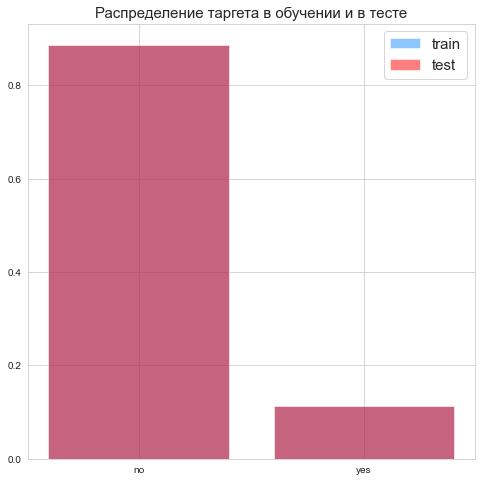

In [30]:
# Проверка, что данные разделились с одинаковым распределением таргета
tmp_train = df_train['y'].value_counts(1).to_dict()
tmp_test = df_test['y'].value_counts(1).to_dict()

plt.title(f'Распределение таргета в обучении и в тесте', fontsize=15);
plt.bar(['no', 'yes'], [tmp_train['no'], tmp_train['yes']], color='dodgerblue', alpha=0.5, label='train');

plt.bar(['no', 'yes'], [tmp_test['no'], tmp_test['yes']], color='red', alpha=0.5, label='test');
plt.legend(fontsize=15);

Закодируйте категориальные признаки с помощью `OrdinalEncoder`. Посчитайте качество (в этом задании будем работать c `AUC-PR`) при применении логистической регрессии. Замерьте время, потребовавшееся на обучение модели (с учетом кодирования признаков).

__Вопрос__: почему в данном задании мы выбрали метрикой именно `AUC-PR`, а не, к примеру, `AUC-ROC`?

__Ваш ответ__: Auc-Pr корректнее применять при дисбалансе классов, чем Auc-Roc так как Auc-Pr корректно учитывает факт дисбаланса классов в отличии от Auc-Roc

In [31]:
#your code here


import time
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import auc, precision_recall_curve

start = time.process_time()


X_train = df_train.drop(['y'], axis=1).copy()
X_test = df_test.drop(['y'], axis=1).copy()

for feature in X_train.columns[(X_train.dtypes == 'object')]:
    ordinal_enc = OrdinalEncoder()
    ordinal_enc.fit(X_train[feature].values.reshape(-1, 1))
    X_train[feature] = ordinal_enc.transform(X_train[feature].values.reshape(-1, 1))
    X_test[feature] = ordinal_enc.transform(X_test[feature].values.reshape(-1, 1))
    
    
model = LogisticRegression()
model.fit(X_train, y_train)

pr, rec, thresholds = precision_recall_curve(y_true=y_test, probas_pred=model.predict_proba(X_test)[:, 1])

print(
    'AUC-PR на тесте:',
    #your code here
    auc(rec, pr)
)

elapsed = (time.process_time() - start)
print(elapsed, "seconds")

AUC-PR на тесте: 0.4159952322956667
1.3039800000000241 seconds


__Задание 4 (0.5 балла).__ Закодируйте все категориальные признаки с помощью one-hot-кодирования. Обучите логистическую регрессию и посмотрите, как изменилось качество модели (с тем, что было до кодирования). Измерьте время, потребовавшееся на кодирование категориальных признаков и обучение модели.



In [32]:
#your code here
#your code here
import time
from itertools import chain
from sklearn.preprocessing import OneHotEncoder

X_train = df_train.drop(['y'], axis=1).copy()
X_test = df_test.drop(['y'], axis=1).copy()
cat_cols = X_train.columns[X_train.dtypes == 'object'].values
noncat_cols = X_train.columns[X_train.dtypes != 'object'].values

st = time.perf_counter() 
ohe_enc = OneHotEncoder()
ohe_enc.fit(X_train[cat_cols])
cat_ohe_names = list(chain.from_iterable(
    [[f'{col}_{category}' for category in ohe_enc.categories_[i]] for i, col in 
     enumerate(cat_cols)]
))

X_train = pd.concat([
    X_train[noncat_cols].reset_index(drop=True),
    pd.DataFrame(ohe_enc.transform(X_train[cat_cols]).toarray(), 
                 columns=cat_ohe_names)
], axis=1)

X_test = pd.concat([
    X_test[noncat_cols].reset_index(drop=True),
    pd.DataFrame(ohe_enc.transform(X_test[cat_cols]).toarray(), 
                 columns=cat_ohe_names)
], axis=1)

end = time.perf_counter() - st
print(f'OneHotEnc обучился и применился за {end // 60} минут {round(end % 60, 2)} секунд')
    
    
st = time.perf_counter() 
model = LogisticRegression()
model.fit(X_train, y_train)
end = time.perf_counter() - st
print(f'Модель обучилась за {end // 60} минут {round(end % 60, 2)} секунд')

pr, rec, thresholds = precision_recall_curve(y_true=y_test, probas_pred=model.predict_proba(X_test)[:, 1])

print(
    'AUC-PR на тесте:',
    #your code here
    auc(rec, pr)
)

OneHotEnc обучился и применился за 0.0 минут 0.13 секунд
Модель обучилась за 0.0 минут 0.25 секунд
AUC-PR на тесте: 0.4350818819734466


Как можно было заменить, one-hot-кодирование может сильно увеличивать количество признаков в датасете, что сказывается на памяти, особенно, если некоторый признак имеет большое количество значений. Эту проблему решает другой способ кодирования категориальных признаков — счётчики. Основная идея в том, что нам важны не сами категории, а значения целевой переменной, которые имеют объекты этой категории. Каждый категориальный признак мы заменим средним значением целевой переменной по всем объектам этой же категории:
$$
g_j(x, X) = \frac{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)][y_i = +1]}{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)]}
$$

__Задание 5 (1 балл).__ Закодируйте категориальные переменные с помощью счётчиков (ровно так, как описано выше без каких-либо хитростей). Обучите логистическую регрессию и посмотрите на качество модели на тестовом множестве. Сравните время обучения с предыдущими экспериментами (с учетом кодирования признаков). Заметили ли вы что-то интересное?

In [33]:
# Обучим модель кодировки "Счётчики"

st = time.perf_counter() 
X_train = df_train.copy()
X_test = df_test.copy()
cat_cols = X_train.columns[X_train.dtypes == 'object'].values
cat_cols = cat_cols[:-1]
noncat_cols = X_train.columns[X_train.dtypes != 'object'].values


X_train['y'].replace({'yes':1, 'no':0}, inplace=True)
X_test['y'].replace({'yes':1, 'no':0}, inplace=True)

for name in cat_cols:
    X_train[name] = X_train[name].map(X_train.groupby(name)['y'].mean())
    X_test[name] = X_test[name].map(X_test.groupby(name)['y'].mean())
    
X_train = X_train.drop(['y'], axis=1)
X_test = X_test.drop(['y'], axis=1)

end = time.perf_counter() - st
print(f'Модель "Счётчики" обучилась и применилась за {end // 60} минут {round(end % 60, 2)} секунд')
    

st = time.perf_counter() 
model = LogisticRegression()
model.fit(X_train, y_train)
end = time.perf_counter() - st    
print(f'Модель обучилась за {end // 60} минут {round(end % 60, 2)} секунд')

pr, rec, thresholds = precision_recall_curve(y_true=y_test, probas_pred=model.predict_proba(X_test)[:, 1])

print(
    'AUC-PR на тесте:',
    #your code here
    auc(rec, pr)
)

Модель "Счётчики" обучилась и применилась за 0.0 минут 0.12 секунд
Модель обучилась за 0.0 минут 0.17 секунд
AUC-PR на тесте: 0.417225516407791


стоит отметить, что заметно уменьшилось время настройки логистической регрессии, 
в семь раз, при том, что время замены категориальных значений осалось прежним.



Отметим, что такие признаки сами по себе являются классификаторами и, обучаясь на них, мы допускаем "утечку" целевой переменной в признаки. Это ведёт к переобучению, поэтому считать такие признаки необходимо таким образом, чтобы при вычислении для конкретного объекта его целевая метка не использовалась. Это можно делать следующими способами:
1. Вычислять значение счётчика по всем объектам расположенным выше в датасете (например, если у нас выборка отсортирована по времени).
2. Вычислять по фолдам, то есть делить выборку на некоторое количество частей и подсчитывать значение признаков по всем фолдам кроме текущего (как делается в кросс-валидации).
3. Внесение некоторого шума в посчитанные признаки. 

__Задание 6. (1 балл)__ Реализуйте корректное вычисление счётчиков самым простым способом — добавление шума к значениям (постарайтесь найти баланс между борьбой с переобучением и сохранением полезности признаков). Снова обучите логистическую регрессию, оцените качество. Сделайте выводы.

In [34]:
# Обучим модель кодировки "Счётчики"

st = time.perf_counter() 
X_train = df_train.copy()
X_test = df_test.copy()
cat_cols = X_train.columns[X_train.dtypes == 'object'].values
cat_cols = cat_cols[:-1]
noncat_cols = X_train.columns[X_train.dtypes != 'object'].values
np.random.seed(113)
noise = np.random.normal(0, 0.2)

X_train['y'].replace({'yes':1, 'no':0}, inplace=True)
X_test['y'].replace({'yes':1, 'no':0}, inplace=True)

for name in cat_cols:
    X_train[name] = X_train[name].map(X_train.groupby(name)['y'].mean()) + noise
    X_test[name] = X_test[name].map(X_test.groupby(name)['y'].mean()) + noise
    
X_train = X_train.drop(['y'], axis=1)
X_test = X_test.drop(['y'], axis=1)

end = time.perf_counter() - st
print(f'Модель "Счётчики" обучилась и применилась за {end // 60} минут {round(end % 60, 2)} секунд')
    

st = time.perf_counter() 
model = LogisticRegression()
model.fit(X_train, y_train)
end = time.perf_counter() - st    
print(f'Модель обучилась за {end // 60} минут {round(end % 60, 2)} секунд')

pr, rec, thresholds = precision_recall_curve(y_true=y_test, probas_pred=model.predict_proba(X_test)[:, 1])

print(
    'AUC-PR на тесте:',
    #your code here
    auc(rec, pr)
)

Модель "Счётчики" обучилась и применилась за 0.0 минут 0.12 секунд
Модель обучилась за 0.0 минут 0.17 секунд
AUC-PR на тесте: 0.4214045869584615


In [35]:
# Auc-pr score
#0.41707460303779775 - sigma=0.01
#0.41356552980226235 - sigma=0.05
#0.4173114311039836 - sigma=0.1
#0.4214045869584615 - sigma=0.2 best
#0.4166797347998871 - sigma=0.3

А теперь ответьте на следующий вопрос: что будет, если некоторая категория встречается в выборке всего несколько раз? По этой причине производится сглаживание счётчиков. Например, на практике хорошие результаты показывает использование сглаживания средним по всей выборке:
$$
g_j(x, X) = \frac{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)][y_i = +1] + C \times global\_mean}{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)] + C}
$$
где $global\_mean$ — доля объектов положительного класса в выборке, $C$ — параметр, определяющий степень сглаживания (например, можно использовать 10 или подобрать для каждого признака свой). Основная идея в том, что мы "разбавляем" среднее значение по некоторой категории глобальным средним значением. И тем меньше, чем большее количество объектов этой категории встречается в выборке. 

Однако для сглаживания вместо среднего значения целевой переменной можно использовать любое другое значение от 0 до 1 (этот параметр иногда называют $prior$). Можно сделать несколько признаков с разными значениями параметра. На практике в задачах бинарной классификации полезными бывают даже отрицательные значения!


__Задание 7 (1 балл).__ Добавьте сглаживание, описанное выше и повторите эксперименты.

In [36]:
#your code here
#your code here
# Обучим модель кодировки "Счётчики с весом и глобальным средним"
def calc_smooth_mean(df, by, on, m):
    # Compute the global mean
    mean = df[on].mean()

    # Compute the number of values and the mean of each group
    agg = df.groupby(by)[on].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']
    
    np.random.seed(113)
    noise = np.random.normal(0, 0.2)
    # Compute the "smoothed" means
    smooth = (counts * means + m * mean) / (counts + m)# + noise

    # Replace each value by the according smoothed mean
    return df[by].map(smooth)

st = time.perf_counter() 
X_train = df_train.copy()
X_test = df_test.copy()
cat_cols = X_train.columns[X_train.dtypes == 'object'].values
noncat_cols = X_train.columns[X_train.dtypes != 'object'].values

X_train['y'].replace({'yes':1, 'no':0}, inplace=True)
X_test['y'].replace({'yes':1, 'no':0}, inplace=True)

m = 50
for name in cat_cols:
    X_train[name] = calc_smooth_mean(X_train, by=name, on='y', m=m)
    X_test[name] = calc_smooth_mean(X_test, by=name, on='y', m=m)

X_train = X_train.drop(['y'], axis=1)
X_test = X_test.drop(['y'], axis=1)

end = time.perf_counter() - st
print(f'Модель "Счётчики с весом и глобальным средним" обучилась и применилась за {end // 60} минут {round(end % 60, 2)} секунд')
    

st = time.perf_counter() 
model = LogisticRegression()
model.fit(X_train, y_train)
end = time.perf_counter() - st    
print(f'Модель обучилась за {end // 60} минут {round(end % 60, 2)} секунд')

pr, rec, thresholds = precision_recall_curve(y_true=y_test, probas_pred=model.predict_proba(X_test)[:, 1])

print(
    'AUC-PR на тесте:',
    #your code here
    auc(rec, pr)
)

Модель "Счётчики с весом и глобальным средним" обучилась и применилась за 0.0 минут 0.18 секунд
Модель обучилась за 0.0 минут 0.15 секунд
AUC-PR на тесте: 0.41711006278156487


In [37]:
#Auc-pr score
#0.4165001299781145 - m=0.1
#0.41727187762822304 - m=1
#0.41738735990452547 - m=5
#0.4192797182111432 - m=10 best
#0.41709260910328394 - m=20
#0.41711006278156487 - m=50

In [38]:
#your code here
# Обучим модель кодировки "Счётчики с весом и глобальным средним" (это дополнительно)
def calc_smooth_mean(df, by, on, m):
    # Compute the global mean
    mean = df[on].mean()

    # Compute the number of values and the mean of each group
    agg = df.groupby(by)[on].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']
    
    np.random.seed(113)
    noise = np.random.normal(0, 0.2)
    # Compute the "smoothed" means
    smooth = (counts * means + m * mean) / (counts + m) + noise

    # Replace each value by the according smoothed mean
    return df[by].map(smooth)

st = time.perf_counter() 
X_train = df_train.copy()
X_test = df_test.copy()
cat_cols = X_train.columns[X_train.dtypes == 'object'].values
noncat_cols = X_train.columns[X_train.dtypes != 'object'].values

X_train['y'].replace({'yes':1, 'no':0}, inplace=True)
X_test['y'].replace({'yes':1, 'no':0}, inplace=True)

m = 20
for name in cat_cols:
    X_train[name] = calc_smooth_mean(X_train, by=name, on='y', m=m)
    X_test[name] = calc_smooth_mean(X_test, by=name, on='y', m=m)

X_train = X_train.drop(['y'], axis=1)
X_test = X_test.drop(['y'], axis=1)

end = time.perf_counter() - st
print(f'Модель "Счётчики с весом и глобальным средним" обучилась и применилась за {end // 60} минут {round(end % 60, 2)} секунд')
    

st = time.perf_counter() 
model = LogisticRegression()
model.fit(X_train, y_train)
end = time.perf_counter() - st    
print(f'Модель обучилась за {end // 60} минут {round(end % 60, 2)} секунд')

pr, rec, thresholds = precision_recall_curve(y_true=y_test, probas_pred=model.predict_proba(X_test)[:, 1])

print(
    'AUC-PR на тесте:',
    #your code here
    auc(rec, pr)
)

Модель "Счётчики с весом и глобальным средним" обучилась и применилась за 0.0 минут 0.19 секунд
Модель обучилась за 0.0 минут 0.16 секунд
AUC-PR на тесте: 0.4172428821746888


In [39]:
# Auc-Pr values
# 0.41709260910328394 - no noise
# 0.4171068874389991 - sigma=0.01
# 0.4172291119063191 - sigma=0.05
# 0.42513616050956177 - sigma=0.1 best
# 0.4172428821746888 - sigma=0.2

__Задание 8 (0.5 балла).__ В данных имеется признак "возраст клиента". Сейчас мы интерпретируем его как числовой, что в общем случае для линейной модели может быть неверной гипотезой. Тем не менее, у этого признака есть довольно много уникальных значений (сколько?), поэтому применять к нему one-hot кодирование может оказаться излишним. Попробуйте закодировать возраст с помощью счетчиков. Стало ли лучше?



In [40]:
#your code here

In [41]:
#your code here
# Обучим модель кодировки "Счётчики с весом и глобальным средним"
def calc_smooth_mean(df, by, on, m):
    # Compute the global mean
    mean = df[on].mean()

    # Compute the number of values and the mean of each group
    agg = df.groupby(by)[on].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']
    
    np.random.seed(113)
    noise = np.random.normal(0, 0.1)
    # Compute the "smoothed" means
    smooth = (counts * means + m * mean) / (counts + m)# + noise

    # Replace each value by the according smoothed mean
    return df[by].map(smooth)

st = time.perf_counter() 
X_train = df_train.copy()
X_test = df_test.copy()
cat_cols = X_train.columns[X_train.dtypes == 'object'].values
cat_cols = np.append(cat_cols, 'age')
noncat_cols = X_train.columns[X_train.dtypes != 'object'].values
noncat_cols = noncat_cols[1:]

X_train['y'].replace({'yes':1, 'no':0}, inplace=True)
X_test['y'].replace({'yes':1, 'no':0}, inplace=True)

m = 10
for name in cat_cols:
    X_train[name] = calc_smooth_mean(X_train, by=name, on='y', m=m)
    X_test[name] = calc_smooth_mean(X_test, by=name, on='y', m=m)

X_train = X_train.drop(['y'], axis=1)
X_test = X_test.drop(['y'], axis=1)

end = time.perf_counter() - st
print(f'Модель "Счётчики с весом и глобальным средним" обучилась и применилась за {end // 60} минут {round(end % 60, 2)} секунд')
    

st = time.perf_counter() 
model = LogisticRegression()
model.fit(X_train, y_train)
end = time.perf_counter() - st    
print(f'Модель обучилась за {end // 60} минут {round(end % 60, 2)} секунд')

pr, rec, thresholds = precision_recall_curve(y_true=y_test, probas_pred=model.predict_proba(X_test)[:, 1])

print(
    'AUC-PR на тесте:',
    #your code here
    auc(rec, pr)
)

Модель "Счётчики с весом и глобальным средним" обучилась и применилась за 0.0 минут 0.19 секунд
Модель обучилась за 0.0 минут 0.14 секунд
AUC-PR на тесте: 0.4265208338811781


стало несколько лучше

Можно пойти и в обратную сторону. У нас есть признаки "месяц и день недели" для звонка. Попробуйте интерпретировать их как числовые (месяц от 0 до 12, дни недели от 0 до 4). Стало ли лучше в этот раз?

In [42]:
#your code here
# Обучим модель кодировки "Счётчики с весом и глобальным средним"
def calc_smooth_mean(df, by, on, m):
    # Compute the global mean
    mean = df[on].mean()

    # Compute the number of values and the mean of each group
    agg = df.groupby(by)[on].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']
    
    np.random.seed(113)
    noise = np.random.normal(0, 0.1)
    # Compute the "smoothed" means
    smooth = (counts * means + m * mean) / (counts + m)# + noise

    # Replace each value by the according smoothed mean
    return df[by].map(smooth)

st = time.perf_counter() 
X_train = df_train.copy()
X_test = df_test.copy()
cat_cols = X_train.columns[X_train.dtypes == 'object'].values
noncat_cols = X_train.columns[X_train.dtypes != 'object'].values

cat_cols = cat_cols[(cat_cols != 'month')&(cat_cols != 'day_of_week')]
#noncat_cols = np.append(noncat_cols, ['month', 'day_of_week'])
X_train['day_of_week'].replace({'mon':0, 'tue':1, 'wed':2, 'thu':3, 'fri':4}, inplace=True)
X_test['day_of_week'].replace({'mon':0, 'tue':1, 'wed':2, 'thu':3, 'fri':4}, inplace=True)

X_train['month'].replace({'jan':0, 'feb':1, 'mar':2, 'apr':3, 'may':4, 
                          'jun':5, 'jul':6, 'aug':7, 'sep':8, 'oct':9,
                          'nov':10, 'dec':11}, inplace=True)
X_test['month'].replace({'jan':0, 'feb':1, 'mar':2, 'apr':3, 'may':4, 
                         'jun':5, 'jul':6, 'aug':7, 'sep':8, 'oct':9,
                         'nov':10, 'dec':11}, inplace=True)

X_train['y'].replace({'yes':1, 'no':0}, inplace=True)
X_test['y'].replace({'yes':1, 'no':0}, inplace=True)

m = 10
for name in cat_cols:
    X_train[name] = calc_smooth_mean(X_train, by=name, on='y', m=m)
    X_test[name] = calc_smooth_mean(X_test, by=name, on='y', m=m)

X_train = X_train.drop(['y'], axis=1)
X_test = X_test.drop(['y'], axis=1)

end = time.perf_counter() - st
print(f'Модель "Счётчики с весом и глобальным средним" обучилась и применилась за {end // 60} минут {round(end % 60, 2)} секунд')
    

st = time.perf_counter() 
model = LogisticRegression()
model.fit(X_train, y_train)
end = time.perf_counter() - st    
print(f'Модель обучилась за {end // 60} минут {round(end % 60, 2)} секунд')

pr, rec, thresholds = precision_recall_curve(y_true=y_test, probas_pred=model.predict_proba(X_test)[:, 1])

print(
    'AUC-PR на тесте:',
    #your code here
    auc(rec, pr)
)

Модель "Счётчики с весом и глобальным средним" обучилась и применилась за 0.0 минут 0.18 секунд
Модель обучилась за 0.0 минут 0.15 секунд
AUC-PR на тесте: 0.4126998970187195


На этот раз лучше не стало

__Замечание.__ Усложнение методов вычисления счётчиков не делают результаты модели гарантированно лучше. Особенно с учётом того, что логистическая регрессия не такая сложная модель, чтобы переобучаться. Поэтому вы необязательно должны были получать на каждом шаге всё лучшие и лучшие результаты (но необходимые результаты у вас должны были получиться).

Как вы должны были заметить, счётчики являются хорошей альтернативой one-hot-кодированию. Напишите, какие плюсы и минусы использования счётчиков по сравнению с one-hot-кодированием вы заметили.

__Ответ:__ скорость работы при использовании счётчиков значительно выросла. На текущих данных это не сильно ощущается, однако если бы данных было существенно больше то это стало бы заметнее

# Часть 2. Отбор признаков

Важной частью процесса построения модели является отбор признаков. На практике многие признаки оказывают малое влияние на модель (при этом их расчёт занимает время) или даже негативно сказываются на качестве модели. Попробуем несколько подходов отбора признаков, оценим, как они влияют на качество модели и сколько времени занимают.

Обратимся к тому же датасету про банковский телефонный маркетинг.

In [51]:
df = pd.read_csv(f'{DATA_PATH}/bank-additional-full.csv', sep=';')

X = df.drop(columns=['duration', 'y'])
y = (df.y == 'yes').astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777, stratify=y)

Как вы помните, в данных много категориальных признаков (сейчас давайте интерпретировать возраст как числовой). Давайте закодируем их с помощью one-hot кодирования. Исходные колонки с категориальными признаками можно удалить. Сколько признаков мы получили?

In [52]:
#your code here
ohe_enc = OneHotEncoder()
cat_cols = X_train.columns[X_train.dtypes == 'object'].values
noncat_cols = X_train.columns[X_train.dtypes != 'object'].values
ohe_enc.fit(X_train[cat_cols])
cat_ohe_names = list(chain.from_iterable(
    [[f'{col}_{category}' for category in ohe_enc.categories_[i]] for i, col in 
     enumerate(cat_cols)]
))

X_train = pd.concat([
    X_train[noncat_cols].reset_index(drop=True),
    pd.DataFrame(ohe_enc.transform(X_train[cat_cols]).toarray(), 
                 columns=cat_ohe_names)
], axis=1)

X_test = pd.concat([
    X_test[noncat_cols].reset_index(drop=True),
    pd.DataFrame(ohe_enc.transform(X_test[cat_cols]).toarray(), 
                 columns=cat_ohe_names)
], axis=1)
print(X_train.shape[1])

62


В качестве основной модели будем использовать логистическую регрессию, а целевой метрики — `AUC-PR`. Обучите модель и посчитайте качество на тестовой выборке. Давайте запомним полученное значение.

In [53]:
#your code here
model = LogisticRegression()
model.fit(X_train, y_train)

pr, rec, thresholds = precision_recall_curve(y_true=y_test, probas_pred=model.predict_proba(X_test)[:, 1])

print(
    'AUC-PR на тесте:',
    #your code here
    auc(rec, pr)
)

AUC-PR на тесте: 0.4300455047108953


### Встроенные методы

Допустим, мы хотим оставить только 40 лучших признаков. Попробуем сделать это несколькими способами.

Начнём с отборам признаков с помощью линейной модели. Как известно, веса линейной модели означают вклад каждого признака в предсказание модели, а значит, модуль этого вклада можно интерпретировать как важность признаков. Такой метод отбора называются встроенным или embedded methods, так как он заложен в особенности модели.

__Задание 8 (0.9 балла = 0.3 * 3).__ Оставьте 40 признаков с наибольшим модулем соответствующего параметра линейной модели. Обучите модели заново и оцените её качество. Замерьте скорость такого отбора признаков.

Изменилось ли качество? Как?



In [54]:
st = time.perf_counter() 
lr = LogisticRegression()
lr.fit(X_train, y_train)

dta = pd.DataFrame(lr.coef_[0], X_train.columns)
dta.rename(columns={0:'base'}, inplace=True)
dta['abs_coefs'] = abs(dta['base'])
best_40_features = dta.sort_values(by='abs_coefs', ascending=False).iloc[:40,:].index
best_40_features

X_train_new = X_train[best_40_features]
X_test_new = X_test[best_40_features]

#your code here
model = LogisticRegression()
model.fit(X_train_new, y_train)

pr, rec, thresholds = precision_recall_curve(y_true=y_test, probas_pred=model.predict_proba(X_test_new)[:, 1])

print(
    'AUC-PR на тесте:',
    #your code here
    auc(rec, pr)
)

end = time.perf_counter() - st    
print(f'Признаки отобрались с помощью логистической регресии и модель обучилась за {end // 60} минут {round(end % 60, 2)} секунд')

AUC-PR на тесте: 0.43883392337763033
Признаки отобрались с помощью логистической регресии и модель обучилась за 0.0 минут 0.49 секунд


А теперь давайте подумаем, что мы не учли. Мы предположили, что признаки вносят вклад равномерно, но не учли их масштаба. Если мы умножим один из признаков в 100 раз, то без учёта регуляризации его вес уменьшится в эти же 100 раз. А мы на основе этого отбираем признаки! Давайте сначала отмасштабируем признаки одним из способов, а только потом будем удалять признаки. 

Кстати, в таком случае надо пересчитать качество на всех признаках (сделайте это ниже). Если вы сделали нормирование признаков в самом начале, то попробуйте отобрать признаки на неотмасштабированных данных.

Что получилось?

In [55]:
df = pd.read_csv(f'{DATA_PATH}/bank-additional-full.csv', sep=';')

X = df.drop(columns=['duration', 'y'])
y = (df.y == 'yes').astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777, stratify=y)

#your code here
ohe_enc = OneHotEncoder()
cat_cols = X_train.columns[X_train.dtypes == 'object'].values
noncat_cols = X_train.columns[X_train.dtypes != 'object'].values
ohe_enc.fit(X_train[cat_cols])
cat_ohe_names = list(chain.from_iterable(
    [[f'{col}_{category}' for category in ohe_enc.categories_[i]] for i, col in 
     enumerate(cat_cols)]
))

X_train_norm_cc = X_train[noncat_cols].apply(lambda x: (x - x.mean())/x.std(), axis=0)
X_test_norm_cc = X_test[noncat_cols].apply(lambda x: (x - x.mean())/x.std(), axis=0)

X_train = pd.concat([
    X_train_norm_cc[noncat_cols].reset_index(drop=True),
    pd.DataFrame(ohe_enc.transform(X_train[cat_cols]).toarray(), 
                 columns=cat_ohe_names)
], axis=1)

X_test = pd.concat([
    X_test_norm_cc[noncat_cols].reset_index(drop=True),
    pd.DataFrame(ohe_enc.transform(X_test[cat_cols]).toarray(), 
                 columns=cat_ohe_names)
], axis=1)
print(X_train.shape[1])

62


In [57]:

lr = LogisticRegression()
lr.fit(X_train, y_train)

dta = pd.DataFrame(lr.coef_[0], X_train.columns)
dta.rename(columns={0:'base'}, inplace=True)
dta['abs_coefs'] = abs(dta['base'])
best_40_features = dta.sort_values(by='abs_coefs', ascending=False).iloc[:40,:].index
best_40_features

X_train_new = X_train[best_40_features]
X_test_new = X_test[best_40_features]
X_test_new.default_yes = 0

#your code here
model = LogisticRegression()
model.fit(X_train_new, y_train)

pr, rec, thresholds = precision_recall_curve(y_true=y_test, probas_pred=model.predict_proba(X_test_new)[:, 1])

print(
    'AUC-PR на тесте:',
    #your code here
    auc(rec, pr)
)

AUC-PR на тесте: 0.44774095122219776


Качество модели выросло

Вопрос на засыпку: one-hot кодирование возвращает нам единичные признаки-индикаторы. Попробуйте также отскалировать их, как и обычные числовые, и снова выбрать 40 главных по вкладу признаков. Изменился ли их список? Изменится ли качество?

In [58]:
#your code here
X_train_norm = X_train.apply(lambda x: (x - x.mean())/x.std(), axis=0)
X_test_norm = X_test.apply(lambda x: (x - x.mean())/x.std(), axis=0)

lr = LogisticRegression()
lr.fit(X_train_norm, y_train)

dta = pd.DataFrame(lr.coef_[0], X_train_norm.columns)
dta.rename(columns={0:'base'}, inplace=True)
dta['abs_coefs'] = abs(dta['base'])
best_40_features = dta.sort_values(by='abs_coefs', ascending=False).iloc[:40,:].index
best_40_features

X_train_new = X_train_norm[best_40_features]
X_test_new = X_test_norm[best_40_features]
X_test_new.default_yes = 0

#your code here
model = LogisticRegression()
model.fit(X_train_new, y_train)

pr, rec, thresholds = precision_recall_curve(y_true=y_test, probas_pred=model.predict_proba(X_test_new)[:, 1])

print(
    'AUC-PR на тесте:',
    #your code here
    auc(rec, pr)
)

AUC-PR на тесте: 0.4480088348526366


качество ещё несколько увеличилось

### Методы фильтрации


Давайте отбирать признаки умнее, а именно через подсчёт некоторой функции для каждого признака. На основании значений этой функции будем оставлять наиболее важные признаки. Методы этого семейства называют фильтрующими или  filter methods. 

В качестве такой функции будем считать t-статистику:

$$t(j) = \frac{|\mu_+ - \mu_-|}{\sqrt{\frac{n_+ \sigma^2_+ + n_- \sigma^2_-}{n_+ + n_-}}},$$

где $\mu$, $\sigma$, $n$ соответственно среднее, стандартное отклонение и количество объектов каждого из классов.

__Задание 9 (0.5 балла).__ Оставьте 40 признаков с наибольшим значением $t$ и замерьте качество. Не забудьте замерить скорость отбора признаков в этом случае.



In [59]:
#your code here
st = time.perf_counter()
df = pd.read_csv(f'{DATA_PATH}/bank-additional-full.csv', sep=';')

X = df.drop(columns=['duration', 'y'])
y = (df.y == 'yes').astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777, stratify=y)

#your code here
ohe_enc = OneHotEncoder()
cat_cols = X_train.columns[X_train.dtypes == 'object'].values
noncat_cols = X_train.columns[X_train.dtypes != 'object'].values
ohe_enc.fit(X_train[cat_cols])
cat_ohe_names = list(chain.from_iterable(
    [[f'{col}_{category}' for category in ohe_enc.categories_[i]] for i, col in 
     enumerate(cat_cols)]
))

X_train_norm_cc = X_train[noncat_cols].apply(lambda x: (x - x.mean())/x.std(), axis=0)
X_test_norm_cc = X_test[noncat_cols].apply(lambda x: (x - x.mean())/x.std(), axis=0)

X_train = pd.concat([
    X_train_norm_cc[noncat_cols].reset_index(drop=True),
    pd.DataFrame(ohe_enc.transform(X_train[cat_cols]).toarray(), 
                 columns=cat_ohe_names)
], axis=1)

X_test = pd.concat([
    X_test_norm_cc[noncat_cols].reset_index(drop=True),
    pd.DataFrame(ohe_enc.transform(X_test[cat_cols]).toarray(), 
                 columns=cat_ohe_names)
], axis=1)


data = X_train.copy()
data['y'] = y_train

data_plus = data[data['y'] == 1]
data_minus = data[data['y'] == 0]

n_plus = len(data_plus)
n_minus = len(data_minus)

t_df = pd.DataFrame([data.drop(columns=['y']).columns]).T.rename(columns={0:'feature'})
t_df['n_plus'] = n_plus
t_df['n_minus'] = n_minus

mu_plus = pd.DataFrame(data_plus.drop(columns=['y']).mean(axis=0)).rename(columns={0:'mu_plus'})
mu_minus = pd.DataFrame(data_minus.drop(columns=['y']).mean(axis=0)).rename(columns={0:'mu_minus'})

t_df.set_index('feature', inplace=True)

t_df = t_df.merge(mu_plus, left_index = True, right_index=True)
t_df = t_df.merge(mu_minus, left_index = True, right_index=True)

sigma_plus = pd.DataFrame(data_plus.drop(columns=['y']).std(axis=0)).rename(columns={0:'sigma_plus'})
sigma_minus = pd.DataFrame(data_plus.drop(columns=['y']).std(axis=0)).rename(columns={0:'sigma_minus'})

t_df = t_df.merge(sigma_plus, left_index = True, right_index=True)
t_df = t_df.merge(sigma_minus, left_index = True, right_index=True)

t_df['t_st'] = abs(t_df['mu_plus'] - t_df['mu_minus'])/np.sqrt((t_df['n_plus']*t_df['sigma_plus']**2 
                                                                + t_df['n_minus']*t_df['sigma_minus']**2)/
                                                              (t_df['n_plus']+t_df['n_minus']))

t_df = t_df.sort_values('t_st', ascending = False)
best_features = t_df.iloc[:40,:].index
best_features


X_train_new = X_train[best_features]
X_test_new = X_test[best_features]

#your code here
model = LogisticRegression()
model.fit(X_train_new, y_train)

pr, rec, thresholds = precision_recall_curve(y_true=y_test, probas_pred=model.predict_proba(X_test_new)[:, 1])

print(
    'AUC-PR на тесте:',
    #your code here
    auc(rec, pr)
)

end = time.perf_counter() - st
print(f'Модель "t-статистика и логистическая регрессия" обучилась и применилась за {end // 60} минут {round(end % 60, 2)} секунд')
    


AUC-PR на тесте: 0.3913946226211532
Модель "t-статистика и логистическая регрессия" обучилась и применилась за 0.0 минут 0.46 секунд


### Методы-обёртки

__Задание 10 (1 балл).__ 

Третий из рассматриваемых нами методов работает следующим образом: мы исключаем по очереди один из признаков и смотрим, как это влияет на качество. Удаляем признаки таким жадным способом, пока не окажется выполненым некоторое условие (количество признаков или ухудшение качества).

Заметим, что нельзя оценивать качество по тестовой выборке, иначе мы можем переобучиться, как, например, при настройке гиперпараметров. Разделите обучающую выборку на 2 части, на одной из них обучайте модель без одного из признаков,  на второй части оценивайте качество. Исходную тестовую выборку стоит использовать только для финальной оценки качества.

Снова оставьте только 40 признаков и оцените качество на тестовой выборке. Сколько времени занял такой отбор признаков?

In [65]:
# from sklearn.metrics import recall_score
# #your code here
# st = time.perf_counter()
# df = pd.read_csv(f'{DATA_PATH}/bank-additional-full.csv', sep=';')

# X = df.drop(columns=['duration', 'y'])
# y = (df.y == 'yes').astype(int)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777, stratify=y)

# #your code here
# ohe_enc = OneHotEncoder()
# cat_cols = X_train.columns[X_train.dtypes == 'object'].values
# noncat_cols = X_train.columns[X_train.dtypes != 'object'].values
# ohe_enc.fit(X_train[cat_cols])
# cat_ohe_names = list(chain.from_iterable(
#     [[f'{col}_{category}' for category in ohe_enc.categories_[i]] for i, col in 
#      enumerate(cat_cols)]
# ))

# X_train_norm_cc = X_train[noncat_cols].apply(lambda x: (x - x.mean())/x.std(), axis=0)
# X_test_norm_cc = X_test[noncat_cols].apply(lambda x: (x - x.mean())/x.std(), axis=0)

# X_train = pd.concat([
#     X_train_norm_cc[noncat_cols].reset_index(drop=True),
#     pd.DataFrame(ohe_enc.transform(X_train[cat_cols]).toarray(), 
#                  columns=cat_ohe_names)
# ], axis=1)

# X_test = pd.concat([
#     X_test_norm_cc[noncat_cols].reset_index(drop=True),
#     pd.DataFrame(ohe_enc.transform(X_test[cat_cols]).toarray(), 
#                  columns=cat_ohe_names)
# ], axis=1)


# data = X_train.copy()


# data_train = data.iloc[:len(data)/2,:]
# d_y_train = y_train[:len(data)/2]
# data_test = data.iloc[len(data)/2:,:]
# d_y_val = y_train[len(data)/2:]


# qualities = []
# for i in data.columns:
#     train = data_train.drop(i)
#     model = LogisticRegression()
#     model.fit(train, d_y_train)
#     y_val_pred = model.predict_proba(data_test)
#     qualities.append(recall_score(d_y_val, y_val_pred))
    
    



# end = time.perf_counter() - st
# print(f'Модель "t-статистика и логистическая регрессия" обучилась и применилась за {end // 60} минут {round(end % 60, 2)} секунд')
    
# немного не доделал

Стоит отметить, что с помощью такого метода можно пойти и в обратную сторону. Попробуйте _добавлять_ по одному самому полезному признаку в выборку до тех пор, пока не наберется 40 штук. Найдется ли порог, при котором добавление следующих признаков будет только ухудшать качество модели?

Давайте подведём итоги по отбору признаков. Назовите преимущества и недостатки каждого из методов. Какой метод привёл к наилучшему качеству?

**Ответ:** 

В последнем методе явным недостатком является требование мощностей, так как модель каждый раз оценивается заново
Логтчным ходом является подсчёт через t-статистику (требуется тоже дополнительное вычисление)
Но лучшие результаты у меня дал скаллинг признаков как обычных так и числовых

# Часть 3. Оценка экономического эффекта модели

В данной части мы займемся тем, что от вас скорее всего потребуется на реальной работе. А именно: мы соберем несколько специализированных метрик качества, попытаемся настроить модель на максимизацию _прибыли_ и оценим, сколько вообще получится заработать на этом. Разумеется, здесь будет сделано множество упрощающих жизнь допущений, но обо всем по порядку. 

__Задание 11 (1 балл).__ Допустим, работники вашего колл-центра получают за один звонок клиенту 1 доллар. При согласии клиента на предлагаемые условия он принесет в банк 10 долларов.

Если вы всё прослушали на экономике, то напомним, что выручка — это сколько денег нам принесли клиенты, а прибыль — выручка за вычетом расходов на зарплату и прочее.

Загрузите данные о телемаркетинге из предыдущего блока заданий. В этой части не нужно делить выборку - мы будем использовать кросс-валидацию. Используйте 5 фолдов, сделайте `shuffle=True, random_state=500`. По кросс-валидации у вас получится 5 вариантов обучающей и тестовой выборки. Обучите логистическую регрессию на каждой обучающей выборке (воспользуйтесь one-hot для категориальных признаков, гиперпараметры оставьте со значениями по умолчанию) и сделайте предсказания для соответствующих тестовых выборок. Допустим, всем положительным прогнозам ваши сотрудники решили позвонить. Посчитайте на всех тестовых выборках выручку и усредните. Сколько денег вы в среднем заработаете? Также вычислите стандартное отклонение.

Сколько из заработанных денег придётся отдать операторам вашего колл-центра?

In [761]:
from sklearn.model_selection import KFold
df = pd.read_csv(f'{DATA_PATH}/bank-additional-full.csv', sep=';')
df['y'].replace({'yes':1, 'no':0}, inplace = True)
# y = (df.y == 'yes').astype(int)
# df.drop(columns={'y'}, inplace = True)

# ohe
ohe_enc = OneHotEncoder()
cat_cols = df.columns[df.dtypes == 'object'].values
noncat_cols = df.columns[df.dtypes != 'object'].values
ohe_enc.fit(df[cat_cols])
cat_ohe_names = list(chain.from_iterable(
    [[f'{col}_{category}' for category in ohe_enc.categories_[i]] for i, col in 
     enumerate(cat_cols)]
))

df = pd.concat([
    df[noncat_cols].reset_index(drop=True),
    pd.DataFrame(ohe_enc.transform(df[cat_cols]).toarray(), 
                 columns=cat_ohe_names)
], axis=1)

# make train and test set using KFold cross validation

kf = KFold(n_splits=5, shuffle=True, random_state=500)

train_indexes = []
test_indexes = []
for train_index, test_index in kf.split(df):
    train_indexes.append(train_index)
    test_indexes.append(test_index)

#1
test_1 = df.iloc[test_indexes[0], :]
test_1_y = df.iloc[test_indexes[0], :]['y']
test_1_x = df.iloc[test_indexes[0], :].drop(columns=['y'])
train_1 = df.iloc[train_indexes[0], :]
train_1_y = df.iloc[train_indexes[0], :]['y']
train_1_x = df.iloc[train_indexes[0], :].drop(columns=['y'])

model_1 = LogisticRegression()
model_1.fit(train_1_x, train_1_y)
y_pred_1 = model_1.predict(test_1_x)
revenue_1 = 10*sum((y_pred_1 == test_1_y)&(y_pred_1!=0))
profit_1 = revenue_1 - sum(y_pred_1)

#2
test_2 = df.iloc[test_indexes[1], :]
test_2_y = df.iloc[test_indexes[1], :]['y']
test_2_x = df.iloc[test_indexes[1], :].drop(columns=['y'])
train_2 = df.iloc[train_indexes[1], :]
train_2_y = df.iloc[train_indexes[1], :]['y']
train_2_x = df.iloc[train_indexes[1], :].drop(columns=['y'])

model_2 = LogisticRegression()
model_2.fit(train_2_x, train_2_y)
y_pred_2 = model_2.predict(test_2_x)
revenue_2 = 10*sum((y_pred_2 == test_2_y)&(y_pred_2 != 0))
profit_2 = revenue_2 - sum(y_pred_2)

#3
test_3 = df.iloc[test_indexes[2], :]
test_3_y = df.iloc[test_indexes[2], :]['y']
test_3_x = df.iloc[test_indexes[2], :].drop(columns=['y'])
train_3 = df.iloc[train_indexes[2], :]
train_3_y = df.iloc[train_indexes[2], :]['y']
train_3_x = df.iloc[train_indexes[2], :].drop(columns=['y'])

model_3 = LogisticRegression()
model_3.fit(train_3_x, train_3_y)
y_pred_3 = model_3.predict(test_3_x)
revenue_3 = 10*sum((y_pred_3 == test_3_y)&(y_pred_3 != 0))
profit_3 = revenue_3 - sum(y_pred_3)

#4
test_4 = df.iloc[test_indexes[3], :]
test_4_y = df.iloc[test_indexes[3], :]['y']
test_4_x = df.iloc[test_indexes[3], :].drop(columns=['y'])
train_4 = df.iloc[train_indexes[3], :]
train_4_y = df.iloc[train_indexes[3], :]['y']
train_4_x = df.iloc[train_indexes[3], :].drop(columns=['y'])

model_4 = LogisticRegression()
model_4.fit(train_4_x, train_4_y)
y_pred_4 = model_4.predict(test_4_x)
revenue_4 = 10*sum((y_pred_4 == test_4_y)&(y_pred_4 != 0))
profit_4 = revenue_4 - sum(y_pred_4)

#5
test_5 = df.iloc[test_indexes[4], :]
test_5_y = df.iloc[test_indexes[4], :]['y']
test_5_x = df.iloc[test_indexes[4], :].drop(columns=['y'])
train_5 = df.iloc[train_indexes[4], :]
train_5_y = df.iloc[train_indexes[4], :]['y']
train_5_x = df.iloc[train_indexes[4], :].drop(columns=['y'])

model_5 = LogisticRegression()
model_5.fit(train_5_x, train_5_y)
y_pred_5 = model_5.predict(test_5_x)
revenue_5 = 10*sum((y_pred_5 == test_5_y)&(y_pred_5 != 0))
profit_5 = revenue_5 - sum(y_pred_5)


mean_revenue = np.mean([revenue_1, revenue_2, revenue_3, revenue_4, revenue_5])
# в среднем заработали 3764 доллара
std_revenue = np.std([revenue_1, revenue_2, revenue_3, revenue_4, revenue_5])
# стандартное отклонение составляет примерно 37.2 доллара
mean_profit = np.mean([profit_1, profit_2, profit_3, profit_4, profit_5])
# прибыль в среднем составила 3196.8 долларов
mean_costs = np.mean([revenue_1 - profit_1, revenue_2 - profit_2, revenue_3 - profit_3,
                      revenue_4 - profit_4, revenue_5 - profit_5])
# прибыль в среднем составила 567.2 доллара

Внесем некоторую долю случайности. Пусть теперь согласный на условия клиент будет приносить не 10 долларов, а случайную величину, равномерно распределенную в интервале $[0;20)$. Проделайте все те же самые действия. Для имитации реальной ситуации **НЕ** фиксируйте `random_seed` при подсчете выручки с клиента. Что получилось?

In [785]:
from sklearn.model_selection import KFold
df = pd.read_csv(f'{DATA_PATH}/bank-additional-full.csv', sep=';')
df['y'].replace({'yes':1, 'no':0}, inplace = True)
# y = (df.y == 'yes').astype(int)
# df.drop(columns={'y'}, inplace = True)

# ohe
ohe_enc = OneHotEncoder()
cat_cols = df.columns[df.dtypes == 'object'].values
noncat_cols = df.columns[df.dtypes != 'object'].values
ohe_enc.fit(df[cat_cols])
cat_ohe_names = list(chain.from_iterable(
    [[f'{col}_{category}' for category in ohe_enc.categories_[i]] for i, col in 
     enumerate(cat_cols)]
))

df = pd.concat([
    df[noncat_cols].reset_index(drop=True),
    pd.DataFrame(ohe_enc.transform(df[cat_cols]).toarray(), 
                 columns=cat_ohe_names)
], axis=1)

# make train and test set using KFold cross validation

kf = KFold(n_splits=5, shuffle=True, random_state=500)

train_indexes = []
test_indexes = []
for train_index, test_index in kf.split(df):
    train_indexes.append(train_index)
    test_indexes.append(test_index)

#1
test_1 = df.iloc[test_indexes[0], :]
test_1_y = df.iloc[test_indexes[0], :]['y']
test_1_x = df.iloc[test_indexes[0], :].drop(columns=['y'])
train_1 = df.iloc[train_indexes[0], :]
train_1_y = df.iloc[train_indexes[0], :]['y']
train_1_x = df.iloc[train_indexes[0], :].drop(columns=['y'])

model_1 = LogisticRegression()
model_1.fit(train_1_x, train_1_y)
y_pred_1 = model_1.predict(test_1_x)
revenue_1 = np.mean(np.random.uniform(low=0.0, high=20.0,size = test_1_x.shape[0]))*sum((y_pred_1 == test_1_y)&(y_pred_1!=0))
profit_1 = revenue_1 - sum(y_pred_1)

#2
test_2 = df.iloc[test_indexes[1], :]
test_2_y = df.iloc[test_indexes[1], :]['y']
test_2_x = df.iloc[test_indexes[1], :].drop(columns=['y'])
train_2 = df.iloc[train_indexes[1], :]
train_2_y = df.iloc[train_indexes[1], :]['y']
train_2_x = df.iloc[train_indexes[1], :].drop(columns=['y'])

model_2 = LogisticRegression()
model_2.fit(train_2_x, train_2_y)
y_pred_2 = model_2.predict(test_2_x)
revenue_2 = np.mean(np.random.uniform(low=0.0, high=20.0,size = test_2_x.shape[0]))*sum((y_pred_2 == test_2_y)&(y_pred_2 != 0))
profit_2 = revenue_2 - sum(y_pred_2)

#3
test_3 = df.iloc[test_indexes[2], :]
test_3_y = df.iloc[test_indexes[2], :]['y']
test_3_x = df.iloc[test_indexes[2], :].drop(columns=['y'])
train_3 = df.iloc[train_indexes[2], :]
train_3_y = df.iloc[train_indexes[2], :]['y']
train_3_x = df.iloc[train_indexes[2], :].drop(columns=['y'])

model_3 = LogisticRegression()
model_3.fit(train_3_x, train_3_y)
y_pred_3 = model_3.predict(test_3_x)
revenue_3 = np.mean(np.random.uniform(low=0.0, high=20.0,size = test_3_x.shape[0]))*sum((y_pred_3 == test_3_y)&(y_pred_3 != 0))
profit_3 = revenue_3 - sum(y_pred_3)

#4
test_4 = df.iloc[test_indexes[3], :]
test_4_y = df.iloc[test_indexes[3], :]['y']
test_4_x = df.iloc[test_indexes[3], :].drop(columns=['y'])
train_4 = df.iloc[train_indexes[3], :]
train_4_y = df.iloc[train_indexes[3], :]['y']
train_4_x = df.iloc[train_indexes[3], :].drop(columns=['y'])

model_4 = LogisticRegression()
model_4.fit(train_4_x, train_4_y)
y_pred_4 = model_4.predict(test_4_x)
revenue_4 = np.mean(np.random.uniform(low=0.0, high=20.0,size = test_4_x.shape[0]))*sum((y_pred_4 == test_4_y)&(y_pred_4 != 0))
profit_4 = revenue_4 - sum(y_pred_4)

#5
test_5 = df.iloc[test_indexes[4], :]
test_5_y = df.iloc[test_indexes[4], :]['y']
test_5_x = df.iloc[test_indexes[4], :].drop(columns=['y'])
train_5 = df.iloc[train_indexes[4], :]
train_5_y = df.iloc[train_indexes[4], :]['y']
train_5_x = df.iloc[train_indexes[4], :].drop(columns=['y'])

model_5 = LogisticRegression()
model_5.fit(train_5_x, train_5_y)
y_pred_5 = model_5.predict(test_5_x)
revenue_5 = np.mean(np.random.uniform(low=0.0, high=20.0,size = test_5_x.shape[0]))*sum((y_pred_5 == test_5_y)&(y_pred_5 != 0))
profit_5 = revenue_5 - sum(y_pred_5)


mean_revenue = np.mean([revenue_1, revenue_2, revenue_3, revenue_4, revenue_5])
std_revenue = np.std([revenue_1, revenue_2, revenue_3, revenue_4, revenue_5])
mean_profit = np.mean([profit_1, profit_2, profit_3, profit_4, profit_5])
mean_costs = np.mean([revenue_1 - profit_1, revenue_2 - profit_2, revenue_3 - profit_3,
                      revenue_4 - profit_4, revenue_5 - profit_5])
# прибыль в среднем составила 567.2 доллара

# результаты очень похожие по выручке и прибыли с предыдущим поунктом, что закономерно, издержки совпали
# выросло стандартное отклонение в среднем, так как теперь есть ещё доля случайности, привносимая равномерно
# распределённой случайной величиной

Настройте по кросс-валидации коэффициент регуляризации модели для максимизации прибыли (считайте как случайную величину выше). Удалось ли получить какой-то выигрыш? При каком коэффициенте регуляризациии прибыль максимальна? Постройте график зависимости ожидаемой прибыли от коэффициента, также укажите стандартные отклонения (вам поможет `plt.errorbar`).

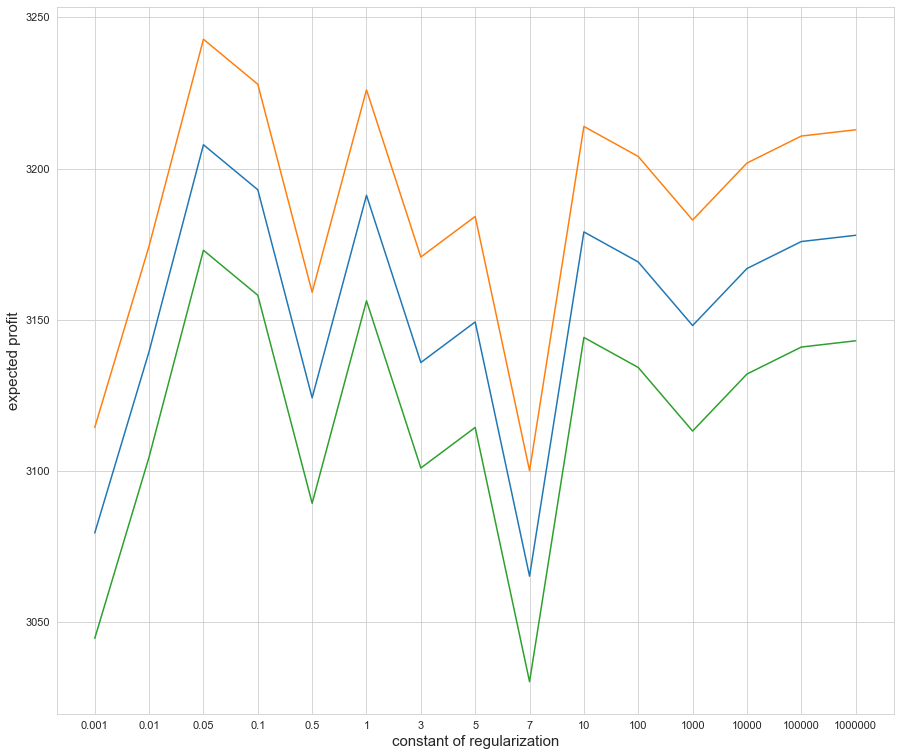

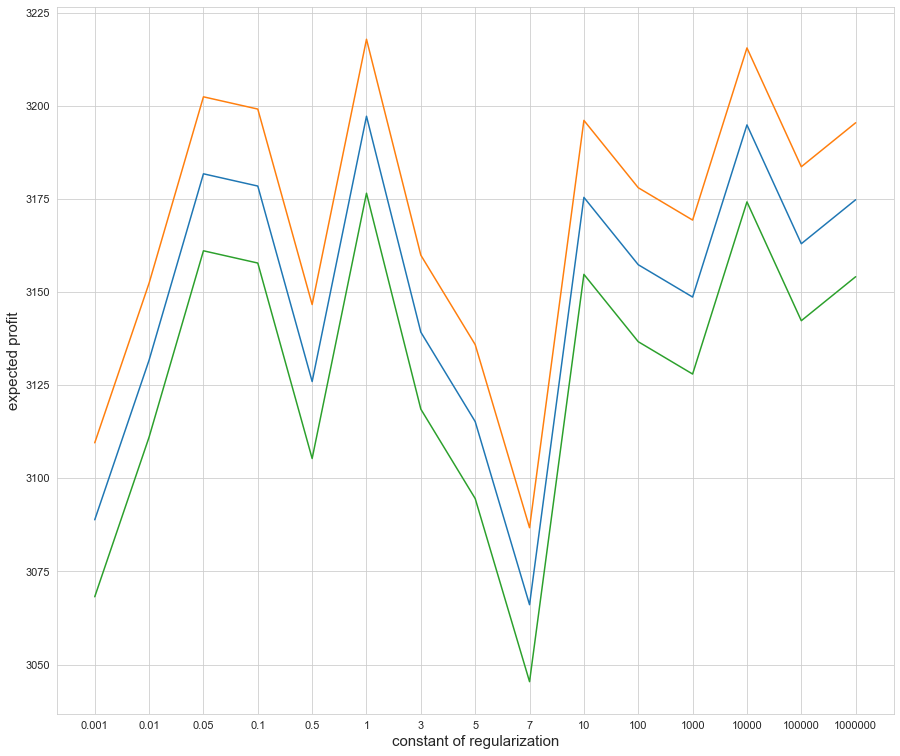

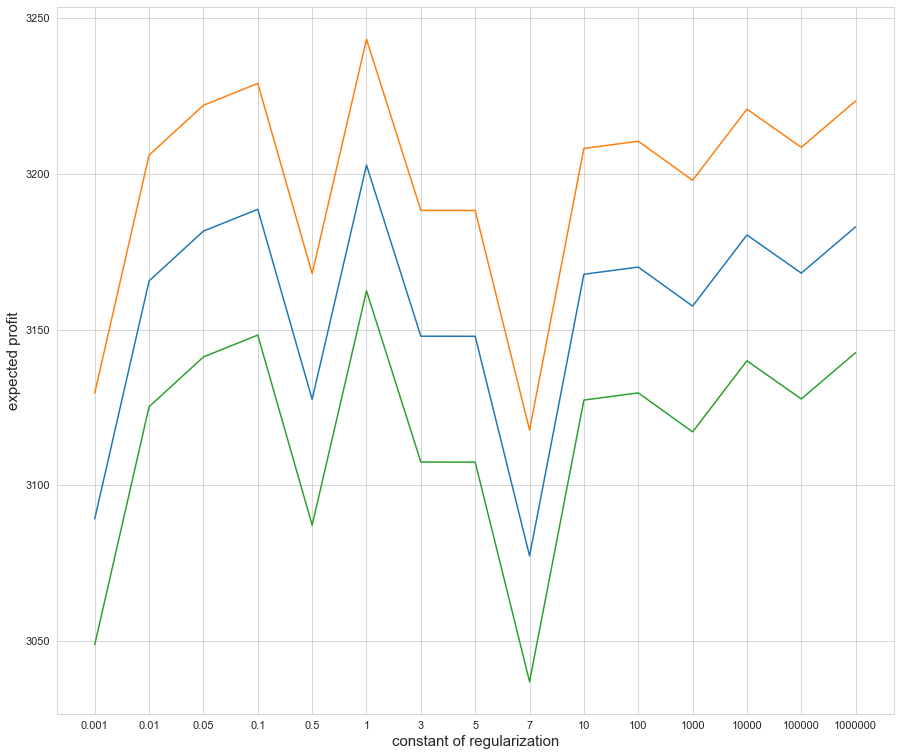

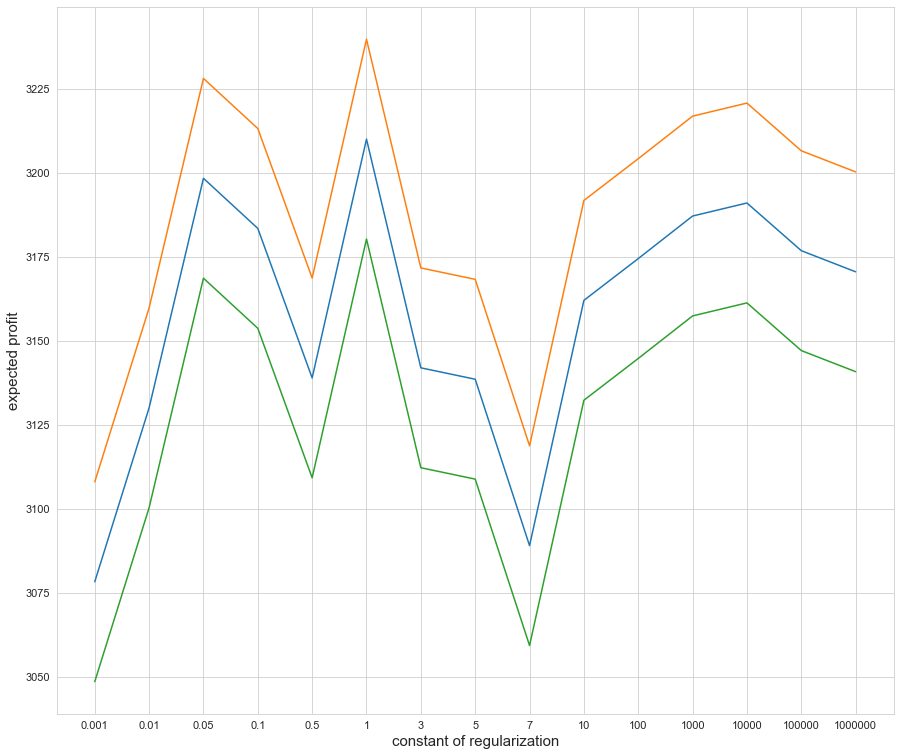

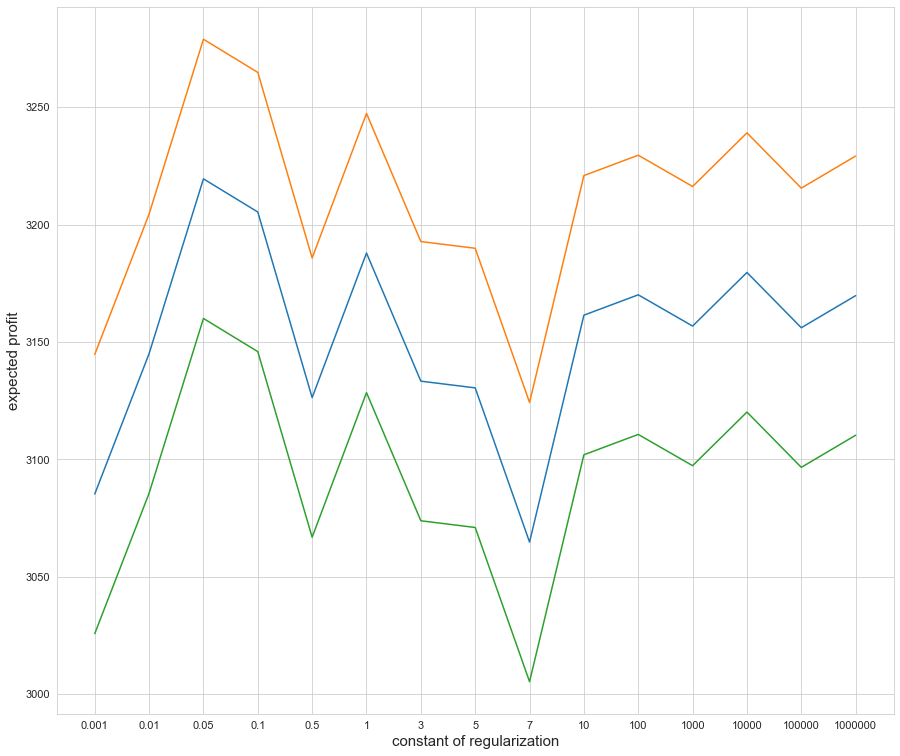

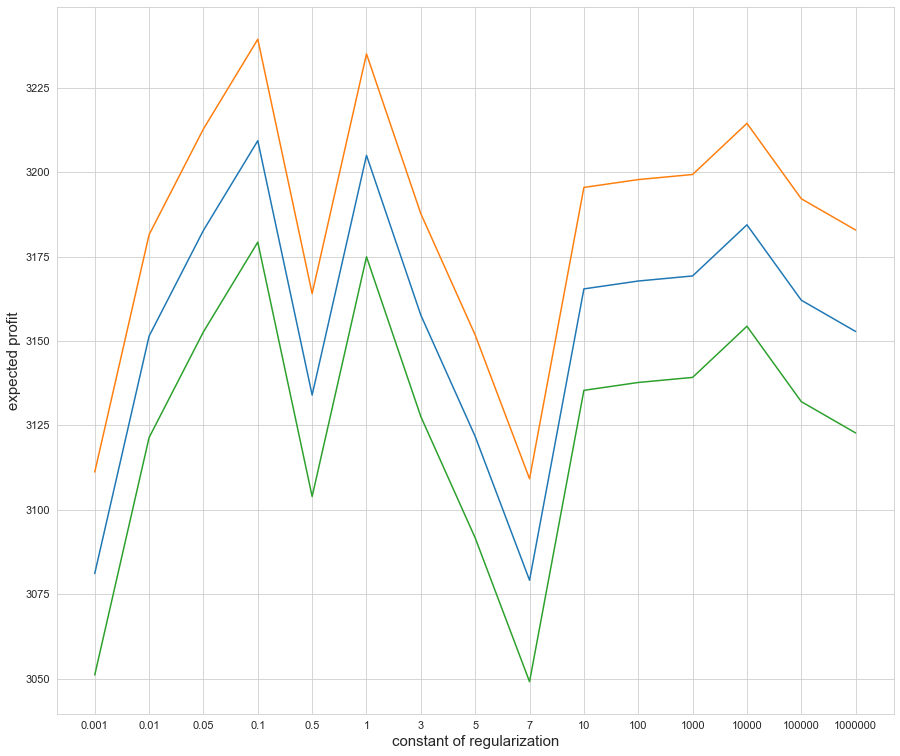

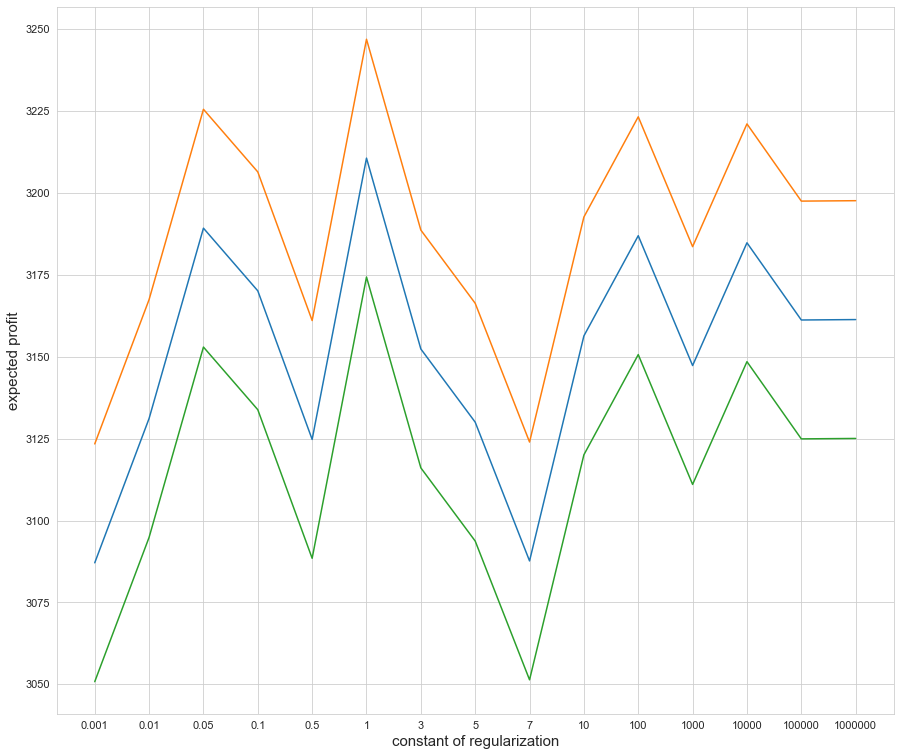

In [72]:
from sklearn.model_selection import KFold
import random
import matplotlib 

for seed in [1,2,3,10,13,42,113]:
    np.random.seed(seed)
    df = pd.read_csv(f'{DATA_PATH}/bank-additional-full.csv', sep=';')
    df['y'].replace({'yes':1, 'no':0}, inplace = True)
    # y = (df.y == 'yes').astype(int)
    # df.drop(columns={'y'}, inplace = True)

    # ohe
    ohe_enc = OneHotEncoder()
    cat_cols = df.columns[df.dtypes == 'object'].values
    noncat_cols = df.columns[df.dtypes != 'object'].values
    ohe_enc.fit(df[cat_cols])
    cat_ohe_names = list(chain.from_iterable(
        [[f'{col}_{category}' for category in ohe_enc.categories_[i]] for i, col in 
         enumerate(cat_cols)]
    ))

    df = pd.concat([
        df[noncat_cols].reset_index(drop=True),
        pd.DataFrame(ohe_enc.transform(df[cat_cols]).toarray(), 
                     columns=cat_ohe_names)
    ], axis=1)

    # make train and test set using KFold cross validation

    kf = KFold(n_splits=5, shuffle=True, random_state=500)

    train_indexes = []
    test_indexes = []
    for train_index, test_index in kf.split(df):
        train_indexes.append(train_index)
        test_indexes.append(test_index)


    mean_profits = []
    std_profits = []
    for C in [0.001, 0.01, 0.05, 0.1, 0.5, 1, 3, 5, 7, 10, 100, 1000, 10000, 100000, 1000000]:    
        #1
        test_1 = df.iloc[test_indexes[0], :]
        test_1_y = df.iloc[test_indexes[0], :]['y']
        test_1_x = df.iloc[test_indexes[0], :].drop(columns=['y'])
        train_1 = df.iloc[train_indexes[0], :]
        train_1_y = df.iloc[train_indexes[0], :]['y']
        train_1_x = df.iloc[train_indexes[0], :].drop(columns=['y'])

        model_1 = LogisticRegression(C = C)
        model_1.fit(train_1_x, train_1_y)
        y_pred_1 = model_1.predict(test_1_x)
        revenue_1 = np.mean(np.random.uniform(low=0.0, high=20.0,size = test_1_x.shape[0]))*sum((y_pred_1 == test_1_y)&(y_pred_1!=0))
        profit_1 = revenue_1 - sum(y_pred_1)

        #2
        test_2 = df.iloc[test_indexes[1], :]
        test_2_y = df.iloc[test_indexes[1], :]['y']
        test_2_x = df.iloc[test_indexes[1], :].drop(columns=['y'])
        train_2 = df.iloc[train_indexes[1], :]
        train_2_y = df.iloc[train_indexes[1], :]['y']
        train_2_x = df.iloc[train_indexes[1], :].drop(columns=['y'])

        model_2 = LogisticRegression(C = C)
        model_2.fit(train_2_x, train_2_y)
        y_pred_2 = model_2.predict(test_2_x)
        revenue_2 = np.mean(np.random.uniform(low=0.0, high=20.0,size = test_2_x.shape[0]))*sum((y_pred_2 == test_2_y)&(y_pred_2 != 0))
        profit_2 = revenue_2 - sum(y_pred_2)

        #3
        test_3 = df.iloc[test_indexes[2], :]
        test_3_y = df.iloc[test_indexes[2], :]['y']
        test_3_x = df.iloc[test_indexes[2], :].drop(columns=['y'])
        train_3 = df.iloc[train_indexes[2], :]
        train_3_y = df.iloc[train_indexes[2], :]['y']
        train_3_x = df.iloc[train_indexes[2], :].drop(columns=['y'])

        model_3 = LogisticRegression(C = C)
        model_3.fit(train_3_x, train_3_y)
        y_pred_3 = model_3.predict(test_3_x)
        revenue_3 = np.mean(np.random.uniform(low=0.0, high=20.0,size = test_3_x.shape[0]))*sum((y_pred_3 == test_3_y)&(y_pred_3 != 0))
        profit_3 = revenue_3 - sum(y_pred_3)

        #4
        test_4 = df.iloc[test_indexes[3], :]
        test_4_y = df.iloc[test_indexes[3], :]['y']
        test_4_x = df.iloc[test_indexes[3], :].drop(columns=['y'])
        train_4 = df.iloc[train_indexes[3], :]
        train_4_y = df.iloc[train_indexes[3], :]['y']
        train_4_x = df.iloc[train_indexes[3], :].drop(columns=['y'])

        model_4 = LogisticRegression(C = C)
        model_4.fit(train_4_x, train_4_y)
        y_pred_4 = model_4.predict(test_4_x)
        revenue_4 = np.mean(np.random.uniform(low=0.0, high=20.0,size = test_4_x.shape[0]))*sum((y_pred_4 == test_4_y)&(y_pred_4 != 0))
        profit_4 = revenue_4 - sum(y_pred_4)

        #5
        test_5 = df.iloc[test_indexes[4], :]
        test_5_y = df.iloc[test_indexes[4], :]['y']
        test_5_x = df.iloc[test_indexes[4], :].drop(columns=['y'])
        train_5 = df.iloc[train_indexes[4], :]
        train_5_y = df.iloc[train_indexes[4], :]['y']
        train_5_x = df.iloc[train_indexes[4], :].drop(columns=['y'])

        model_5 = LogisticRegression(C = C)
        model_5.fit(train_5_x, train_5_y)
        y_pred_5 = model_5.predict(test_5_x)
        revenue_5 = np.mean(np.random.uniform(low=0.0, high=20.0,size = test_5_x.shape[0]))*sum((y_pred_5 == test_5_y)&(y_pred_5 != 0))
        profit_5 = revenue_5 - sum(y_pred_5)


        mean_revenue = np.mean([revenue_1, revenue_2, revenue_3, revenue_4, revenue_5])
        std_revenue = np.std([revenue_1, revenue_2, revenue_3, revenue_4, revenue_5])
        mean_profit = np.mean([profit_1, profit_2, profit_3, profit_4, profit_5])
        mean_costs = np.mean([revenue_1 - profit_1, revenue_2 - profit_2, revenue_3 - profit_3,
                              revenue_4 - profit_4, revenue_5 - profit_5])
        mean_profits.append(mean_profit)  
        std_profits.append(std_revenue)


    data = pd.DataFrame(mean_profits, 
                       ['0.001', '0.01', '0.05', '0.1', '0.5', '1', '3', '5', '7', '10', '100', '1000', '10000', '100000', '1000000'])
    data_plus_std = pd.DataFrame(mean_profits+std_revenue, 
                       ['0.001', '0.01', '0.05', '0.1', '0.5', '1', '3', '5', '7', '10', '100', '1000', '10000', '100000', '1000000'])
    data_minus_std = pd.DataFrame(mean_profits-std_revenue, 
                       ['0.001', '0.01', '0.05', '0.1', '0.5', '1', '3', '5', '7', '10', '100', '1000', '10000', '100000', '1000000'])


    matplotlib.rc('xtick', labelsize=11) 
    matplotlib.rc('ytick', labelsize=11)
    plt.figure(figsize=(15,13))

    plt.plot(data);
    plt.plot(data_plus_std);
    plt.plot(data_minus_std);
    plt.xlabel('constant of regularization', fontsize = 15)
    plt.ylabel('expected profit', fontsize = 15)



<ErrorbarContainer object of 3 artists>

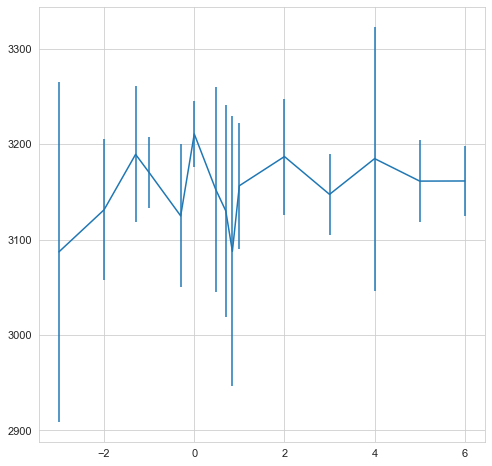

In [74]:
#если с errorbar и пролагорифмировать c
plt.errorbar(x = np.log10([0.001, 0.01, 0.05, 0.1, 0.5, 1, 3, 5, 7, 10, 100, 1000, 10000, 100000, 1000000]),
             y = mean_profits, yerr = std_profits)

In [854]:
df = pd.read_csv(f'{DATA_PATH}/bank-additional-full.csv', sep=';')
df['y'].replace({'yes':1, 'no':0}, inplace = True)
# y = (df.y == 'yes').astype(int)
# df.drop(columns={'y'}, inplace = True)

# ohe
ohe_enc = OneHotEncoder()
cat_cols = df.columns[df.dtypes == 'object'].values
noncat_cols = df.columns[df.dtypes != 'object'].values
ohe_enc.fit(df[cat_cols])
cat_ohe_names = list(chain.from_iterable(
    [[f'{col}_{category}' for category in ohe_enc.categories_[i]] for i, col in 
     enumerate(cat_cols)]
))

df = pd.concat([
    df[noncat_cols].reset_index(drop=True),
    pd.DataFrame(ohe_enc.transform(df[cat_cols]).toarray(), 
                 columns=cat_ohe_names)
], axis=1)

# make train and test set using KFold cross validation

kf = KFold(n_splits=5, shuffle=True, random_state=500)

balance = df.copy()
balance['random_var'] = np.random.uniform(low=0.0, high=20.0,size = df.shape[0])



train_indexes = []
test_indexes = []
for train_index, test_index in kf.split(df):
    train_indexes.append(train_index)
    test_indexes.append(test_index)
    
df = balance.copy()    
test_1 = df.iloc[test_indexes[0], :]
test_1_y = df.iloc[test_indexes[0], :]['y']
test_1_x = df.iloc[test_indexes[0], :].drop(columns=['y','random_var'])
train_1 = df.iloc[train_indexes[0], :]
train_1_y = df.iloc[train_indexes[0], :]['y']
train_1_x = df.iloc[train_indexes[0], :].drop(columns=['y','random_var'])

model_1 = LogisticRegression()
model_1.fit(train_1_x, train_1_y)
y_pred_1 = model_1.predict(test_1_x)

balance_1 = test_1_x.copy()
balance_1['y_pred'] = y_pred_1
balance_1['y_test'] = test_1_y
balance_1['revenue_from_client'] = balance_1['y_pred']*balance_1['y_test']*df.iloc[test_indexes[0], :]['random_var']
revenue_1 = np.sum(balance_1['revenue_from_client'])
profit_1 = revenue_1 - sum(y_pred_1)
    

In [ ]:
# Data
aluminum = np.array([6.4e-5 , 3.01e-5 , 2.36e-5, 3.0e-5, 7.0e-5, 4.5e-5, 3.8e-5,
                     4.2e-5, 2.62e-5, 3.6e-5])
copper = np.array([4.5e-5 , 1.97e-5 , 1.6e-5, 1.97e-5, 4.0e-5, 2.4e-5, 1.9e-5, 
                   2.41e-5 , 1.85e-5, 3.3e-5 ])
steel = np.array([3.3e-5 , 1.2e-5 , 0.9e-5, 1.2e-5, 1.3e-5, 1.6e-5, 1.4e-5, 
                  1.58e-5, 1.32e-5 , 2.1e-5])

# Calculate the average
aluminum_mean = np.mean(aluminum)
copper_mean = np.mean(copper)
steel_mean = np.mean(steel)


# Calculate the standard deviation
aluminum_std = np.std(aluminum)
copper_std = np.std(copper)
steel_std = np.std(steel)


# Define labels, positions, bar heights and error bar heights
labels = ['Aluminum', 'Copper', 'Steel']
x_pos = np.arange(len(labels))
CTEs = [aluminum_mean, copper_mean, steel_mean]
error = [aluminum_std, copper_std, steel_std]

# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax.set_ylabel('Coefficient of Thermal Expansion')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Coefficent of Thermal Expansion (CTE) of Three Metals')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()

In [ ]:
# Data
aluminum = np.array([6.4e-5 , 3.01e-5 , 2.36e-5, 3.0e-5, 7.0e-5, 4.5e-5, 3.8e-5,
                     4.2e-5, 2.62e-5, 3.6e-5])
copper = np.array([4.5e-5 , 1.97e-5 , 1.6e-5, 1.97e-5, 4.0e-5, 2.4e-5, 1.9e-5, 
                   2.41e-5 , 1.85e-5, 3.3e-5 ])
steel = np.array([3.3e-5 , 1.2e-5 , 0.9e-5, 1.2e-5, 1.3e-5, 1.6e-5, 1.4e-5, 
                  1.58e-5, 1.32e-5 , 2.1e-5])

# Calculate the average
aluminum_mean = np.mean(aluminum)
copper_mean = np.mean(copper)
steel_mean = np.mean(steel)


# Calculate the standard deviation
aluminum_std = np.std(aluminum)
copper_std = np.std(copper)
steel_std = np.std(steel)


# Define labels, positions, bar heights and error bar heights
labels = ['Aluminum', 'Copper', 'Steel']
x_pos = np.arange(len(labels))
CTEs = [aluminum_mean, copper_mean, steel_mean]
error = [aluminum_std, copper_std, steel_std]

# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax.set_ylabel('Coefficient of Thermal Expansion')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Coefficent of Thermal Expansion (CTE) of Three Metals')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()

In [ ]:
from sklearn.model_selection import KFold
import random
import matplotlib 

#for seed in [1,2,3,10,13,42,113]:
seed = 1
np.random.seed(seed)
df = pd.read_csv(f'{DATA_PATH}/bank-additional-full.csv', sep=';')
df['y'].replace({'yes':1, 'no':0}, inplace = True)
# y = (df.y == 'yes').astype(int)
# df.drop(columns={'y'}, inplace = True)

# ohe
ohe_enc = OneHotEncoder()
cat_cols = df.columns[df.dtypes == 'object'].values
noncat_cols = df.columns[df.dtypes != 'object'].values
ohe_enc.fit(df[cat_cols])
cat_ohe_names = list(chain.from_iterable(
    [[f'{col}_{category}' for category in ohe_enc.categories_[i]] for i, col in 
     enumerate(cat_cols)]
))

df = pd.concat([
    df[noncat_cols].reset_index(drop=True),
    pd.DataFrame(ohe_enc.transform(df[cat_cols]).toarray(), 
                 columns=cat_ohe_names)
], axis=1)

# make train and test set using KFold cross validation

kf = KFold(n_splits=5, shuffle=True, random_state=500)

balance = df.copy()
balance['random_var'] = np.random.uniform(low=0.0, high=20.0,size = df.shape[0])
balance['real_revenue_from_client'] = balance['random_var']*balance['y']

train_indexes = []
test_indexes = []
for train_index, test_index in kf.split(df):
    train_indexes.append(train_index)
    test_indexes.append(test_index)


mean_profits = []
for C in [0.01, 0.1, 1, 10, 100, 1000]:    
    #1
    test_1 = df.iloc[test_indexes[0], :]
    test_1_y = df.iloc[test_indexes[0], :]['y']
    test_1_x = df.iloc[test_indexes[0], :].drop(columns=['y'])
    train_1 = df.iloc[train_indexes[0], :]
    train_1_y = df.iloc[train_indexes[0], :]['y']
    train_1_x = df.iloc[train_indexes[0], :].drop(columns=['y'])

    model_1 = LogisticRegression(C = C)
    model_1.fit(train_1_x, train_1_y)
    y_pred_1 = model_1.predict(test_1_x)
    
    revenue_1 = np.mean(np.random.uniform(low=0.0, high=20.0,size = test_1_x.shape[0]))*sum((y_pred_1 == test_1_y)&(y_pred_1!=0))
    profit_1 = revenue_1 - sum(y_pred_1)

    #2
    test_2 = df.iloc[test_indexes[1], :]
    test_2_y = df.iloc[test_indexes[1], :]['y']
    test_2_x = df.iloc[test_indexes[1], :].drop(columns=['y'])
    train_2 = df.iloc[train_indexes[1], :]
    train_2_y = df.iloc[train_indexes[1], :]['y']
    train_2_x = df.iloc[train_indexes[1], :].drop(columns=['y'])

    model_2 = LogisticRegression(C = C)
    model_2.fit(train_2_x, train_2_y)
    y_pred_2 = model_2.predict(test_2_x)
    revenue_2 = np.mean(np.random.uniform(low=0.0, high=20.0,size = test_2_x.shape[0]))*sum((y_pred_2 == test_2_y)&(y_pred_2 != 0))
    profit_2 = revenue_2 - sum(y_pred_2)

    #3
    test_3 = df.iloc[test_indexes[2], :]
    test_3_y = df.iloc[test_indexes[2], :]['y']
    test_3_x = df.iloc[test_indexes[2], :].drop(columns=['y'])
    train_3 = df.iloc[train_indexes[2], :]
    train_3_y = df.iloc[train_indexes[2], :]['y']
    train_3_x = df.iloc[train_indexes[2], :].drop(columns=['y'])

    model_3 = LogisticRegression(C = C)
    model_3.fit(train_3_x, train_3_y)
    y_pred_3 = model_3.predict(test_3_x)
    revenue_3 = np.mean(np.random.uniform(low=0.0, high=20.0,size = test_3_x.shape[0]))*sum((y_pred_3 == test_3_y)&(y_pred_3 != 0))
    profit_3 = revenue_3 - sum(y_pred_3)

    #4
    test_4 = df.iloc[test_indexes[3], :]
    test_4_y = df.iloc[test_indexes[3], :]['y']
    test_4_x = df.iloc[test_indexes[3], :].drop(columns=['y'])
    train_4 = df.iloc[train_indexes[3], :]
    train_4_y = df.iloc[train_indexes[3], :]['y']
    train_4_x = df.iloc[train_indexes[3], :].drop(columns=['y'])

    model_4 = LogisticRegression(C = C)
    model_4.fit(train_4_x, train_4_y)
    y_pred_4 = model_4.predict(test_4_x)
    revenue_4 = np.mean(np.random.uniform(low=0.0, high=20.0,size = test_4_x.shape[0]))*sum((y_pred_4 == test_4_y)&(y_pred_4 != 0))
    profit_4 = revenue_4 - sum(y_pred_4)

    #5
    test_5 = df.iloc[test_indexes[4], :]
    test_5_y = df.iloc[test_indexes[4], :]['y']
    test_5_x = df.iloc[test_indexes[4], :].drop(columns=['y'])
    train_5 = df.iloc[train_indexes[4], :]
    train_5_y = df.iloc[train_indexes[4], :]['y']
    train_5_x = df.iloc[train_indexes[4], :].drop(columns=['y'])

    model_5 = LogisticRegression(C = C)
    model_5.fit(train_5_x, train_5_y)
    y_pred_5 = model_5.predict(test_5_x)
    revenue_5 = np.mean(np.random.uniform(low=0.0, high=20.0,size = test_5_x.shape[0]))*sum((y_pred_5 == test_5_y)&(y_pred_5 != 0))
    profit_5 = revenue_5 - sum(y_pred_5)


    mean_revenue = np.mean([revenue_1, revenue_2, revenue_3, revenue_4, revenue_5])
    std_revenue = np.std([revenue_1, revenue_2, revenue_3, revenue_4, revenue_5])
    mean_profit = np.mean([profit_1, profit_2, profit_3, profit_4, profit_5])
    mean_costs = np.mean([revenue_1 - profit_1, revenue_2 - profit_2, revenue_3 - profit_3,
                          revenue_4 - profit_4, revenue_5 - profit_5])
    mean_profits.append(mean_profit)  


data = pd.DataFrame(mean_profits, 
                   ['0.001', '0.01', '0.05', '0.1', '0.5', '1', '3', '5', '7', '10', '100', '1000', '10000', '100000', '1000000'])
data_plus_std = pd.DataFrame(mean_profits+std_revenue, 
                   ['0.001', '0.01', '0.05', '0.1', '0.5', '1', '3', '5', '7', '10', '100', '1000', '10000', '100000', '1000000'])
data_minus_std = pd.DataFrame(mean_profits-std_revenue, 
                   ['0.001', '0.01', '0.05', '0.1', '0.5', '1', '3', '5', '7', '10', '100', '1000', '10000', '100000', '1000000'])


matplotlib.rc('xtick', labelsize=11) 
matplotlib.rc('ytick', labelsize=11)
plt.figure(figsize=(15,13))

plt.plot(data);
plt.plot(data_plus_std);
plt.plot(data_minus_std);
plt.xlabel('constant of regularization', fontsize = 15)
plt.ylabel('expected profit', fontsize = 15)



Попробуйте запустить перебор несколько раз. Находится ли каждый раз один и тот же "лучший" коэффициент? Присутствует ли какая-то закономерность? Какие вы можете сделать из этого выводы?

Из предыдущего пункта видно, что запустив случайную итерацию несколько раз максимум не всегда в одном месте, 
но стоит сказать, что чаще всегоон расположен около 0.1, 0.5, 1

__Задание 12 (1 балл).__ Выше мы уже описали примерную экономическую модель вашей задачи. Как вы считаете, что для вашего бизнеса важнее — хороший precision или recall модели? Почему?

__Ответ:__



Для нашей модели важнее звонить тем клиентам которые скорее согласятся на услугу, а значит нам важно не делать звонков тем, 
кто не заинтересован, так как толку от таких клиентов не будет, а издержки на операторов присутствуют. Таким образом Precision нам
важнее.

Вспомним, что на самом деле логистическая регрессия предсказывает нам вероятности положительного класса для объекта. Возможно, путем настройки порога бинаризации этих вероятностей мы сможем получить какой-то выигрыш? Проверьте ваши рассуждения выше с помощью настройки порога бинаризации на кросс-валидации для максимизации прибыли. Воспользуйтесь сеткой от 0 до 1 с шагом 0.01. Напомним, что снижение порога дает нам более высокий recall и более низкий precision, и наоборот.

Text(0, 0.5, 'expected profit')

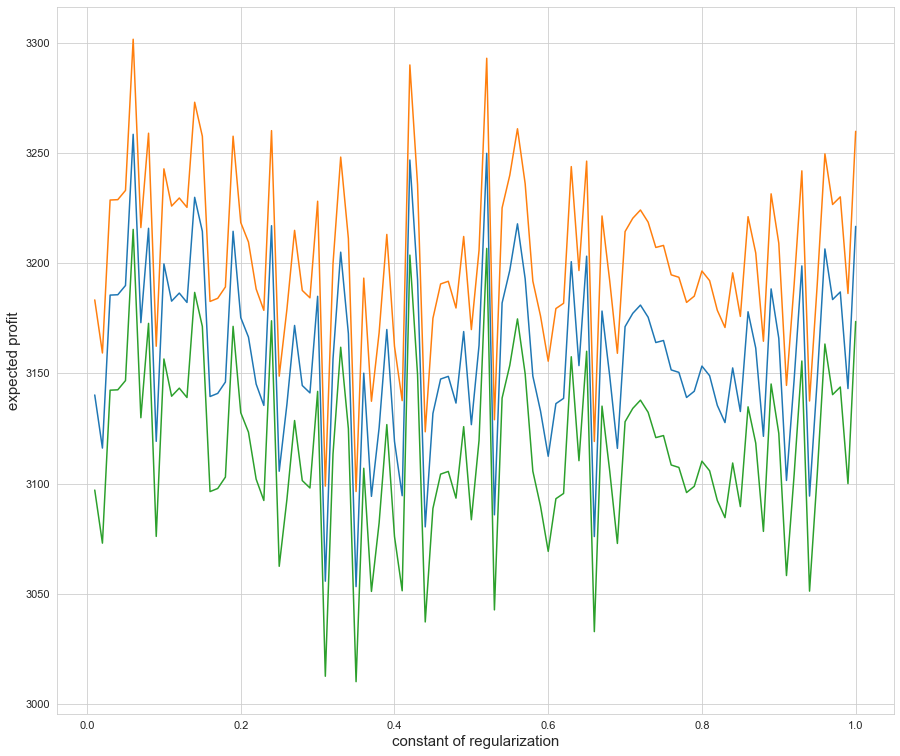

In [868]:
from sklearn.model_selection import KFold
import random
import matplotlib 


param_set = list(np.arange(0.01,1.01,0.01))
seed = 1
np.random.seed(seed)
df = pd.read_csv(f'{DATA_PATH}/bank-additional-full.csv', sep=';')
df['y'].replace({'yes':1, 'no':0}, inplace = True)
# y = (df.y == 'yes').astype(int)
# df.drop(columns={'y'}, inplace = True)

# ohe
ohe_enc = OneHotEncoder()
cat_cols = df.columns[df.dtypes == 'object'].values
noncat_cols = df.columns[df.dtypes != 'object'].values
ohe_enc.fit(df[cat_cols])
cat_ohe_names = list(chain.from_iterable(
    [[f'{col}_{category}' for category in ohe_enc.categories_[i]] for i, col in 
     enumerate(cat_cols)]
))

df = pd.concat([
    df[noncat_cols].reset_index(drop=True),
    pd.DataFrame(ohe_enc.transform(df[cat_cols]).toarray(), 
                 columns=cat_ohe_names)
], axis=1)

# make train and test set using KFold cross validation

kf = KFold(n_splits=5, shuffle=True, random_state=500)

train_indexes = []
test_indexes = []
for train_index, test_index in kf.split(df):
    train_indexes.append(train_index)
    test_indexes.append(test_index)


mean_profits = []
for C in param_set:    
    #1
    test_1 = df.iloc[test_indexes[0], :]
    test_1_y = df.iloc[test_indexes[0], :]['y']
    test_1_x = df.iloc[test_indexes[0], :].drop(columns=['y'])
    train_1 = df.iloc[train_indexes[0], :]
    train_1_y = df.iloc[train_indexes[0], :]['y']
    train_1_x = df.iloc[train_indexes[0], :].drop(columns=['y'])

    model_1 = LogisticRegression(C = C)
    model_1.fit(train_1_x, train_1_y)
    y_pred_1 = model_1.predict(test_1_x)
    
    revenue_1 = np.mean(np.random.uniform(low=0.0, high=20.0,size = test_1_x.shape[0]))*sum((y_pred_1 == test_1_y)&(y_pred_1!=0))
    profit_1 = revenue_1 - sum(y_pred_1)

    #2
    test_2 = df.iloc[test_indexes[1], :]
    test_2_y = df.iloc[test_indexes[1], :]['y']
    test_2_x = df.iloc[test_indexes[1], :].drop(columns=['y'])
    train_2 = df.iloc[train_indexes[1], :]
    train_2_y = df.iloc[train_indexes[1], :]['y']
    train_2_x = df.iloc[train_indexes[1], :].drop(columns=['y'])

    model_2 = LogisticRegression(C = C)
    model_2.fit(train_2_x, train_2_y)
    y_pred_2 = model_2.predict(test_2_x)
    revenue_2 = np.mean(np.random.uniform(low=0.0, high=20.0,size = test_2_x.shape[0]))*sum((y_pred_2 == test_2_y)&(y_pred_2 != 0))
    profit_2 = revenue_2 - sum(y_pred_2)

    #3
    test_3 = df.iloc[test_indexes[2], :]
    test_3_y = df.iloc[test_indexes[2], :]['y']
    test_3_x = df.iloc[test_indexes[2], :].drop(columns=['y'])
    train_3 = df.iloc[train_indexes[2], :]
    train_3_y = df.iloc[train_indexes[2], :]['y']
    train_3_x = df.iloc[train_indexes[2], :].drop(columns=['y'])

    model_3 = LogisticRegression(C = C)
    model_3.fit(train_3_x, train_3_y)
    y_pred_3 = model_3.predict(test_3_x)
    revenue_3 = np.mean(np.random.uniform(low=0.0, high=20.0,size = test_3_x.shape[0]))*sum((y_pred_3 == test_3_y)&(y_pred_3 != 0))
    profit_3 = revenue_3 - sum(y_pred_3)

    #4
    test_4 = df.iloc[test_indexes[3], :]
    test_4_y = df.iloc[test_indexes[3], :]['y']
    test_4_x = df.iloc[test_indexes[3], :].drop(columns=['y'])
    train_4 = df.iloc[train_indexes[3], :]
    train_4_y = df.iloc[train_indexes[3], :]['y']
    train_4_x = df.iloc[train_indexes[3], :].drop(columns=['y'])

    model_4 = LogisticRegression(C = C)
    model_4.fit(train_4_x, train_4_y)
    y_pred_4 = model_4.predict(test_4_x)
    revenue_4 = np.mean(np.random.uniform(low=0.0, high=20.0,size = test_4_x.shape[0]))*sum((y_pred_4 == test_4_y)&(y_pred_4 != 0))
    profit_4 = revenue_4 - sum(y_pred_4)

    #5
    test_5 = df.iloc[test_indexes[4], :]
    test_5_y = df.iloc[test_indexes[4], :]['y']
    test_5_x = df.iloc[test_indexes[4], :].drop(columns=['y'])
    train_5 = df.iloc[train_indexes[4], :]
    train_5_y = df.iloc[train_indexes[4], :]['y']
    train_5_x = df.iloc[train_indexes[4], :].drop(columns=['y'])

    model_5 = LogisticRegression(C = C)
    model_5.fit(train_5_x, train_5_y)
    y_pred_5 = model_5.predict(test_5_x)
    revenue_5 = np.mean(np.random.uniform(low=0.0, high=20.0,size = test_5_x.shape[0]))*sum((y_pred_5 == test_5_y)&(y_pred_5 != 0))
    profit_5 = revenue_5 - sum(y_pred_5)


    mean_revenue = np.mean([revenue_1, revenue_2, revenue_3, revenue_4, revenue_5])
    std_revenue = np.std([revenue_1, revenue_2, revenue_3, revenue_4, revenue_5])
    mean_profit = np.mean([profit_1, profit_2, profit_3, profit_4, profit_5])
    mean_costs = np.mean([revenue_1 - profit_1, revenue_2 - profit_2, revenue_3 - profit_3,
                          revenue_4 - profit_4, revenue_5 - profit_5])
    mean_profits.append(mean_profit)  


data = pd.DataFrame(mean_profits, param_set)
data_plus_std = pd.DataFrame(mean_profits+std_revenue, param_set)
data_minus_std = pd.DataFrame(mean_profits-std_revenue, param_set)


matplotlib.rc('xtick', labelsize=11) 
matplotlib.rc('ytick', labelsize=11)
plt.figure(figsize=(15,13))

plt.plot(data);
plt.plot(data_plus_std);
plt.plot(data_minus_std);
plt.xlabel('constant of regularization', fontsize = 15)
plt.ylabel('expected profit', fontsize = 15)



Text(0, 0.5, 'expected profit')

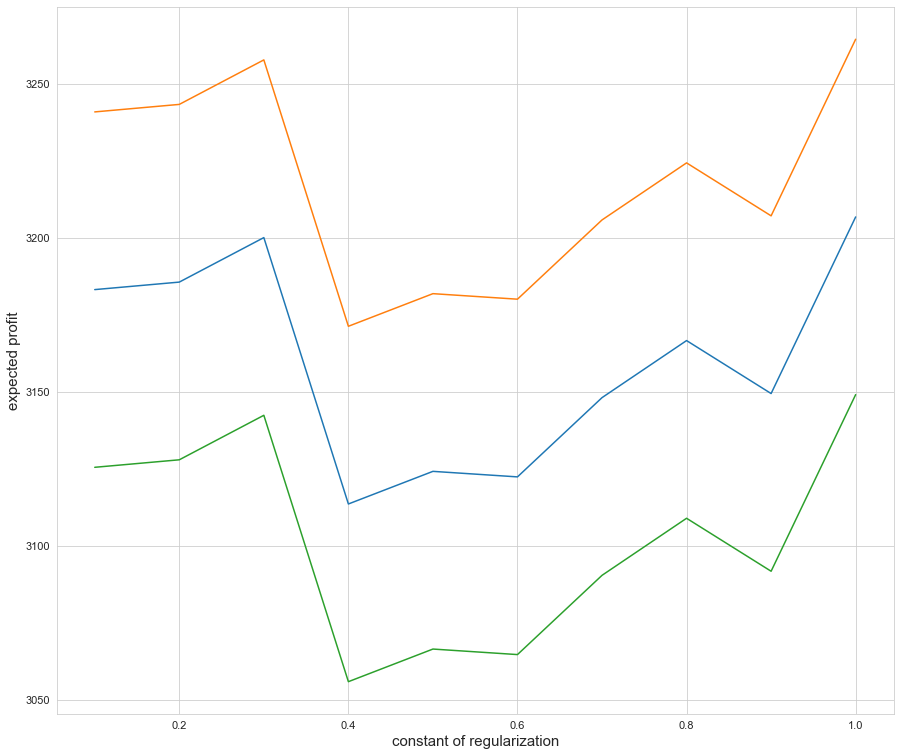

In [866]:
from sklearn.model_selection import KFold
import random
import matplotlib 


param_set = list(np.arange(0.1,1.1,0.1))
seed = 1
np.random.seed(seed)
df = pd.read_csv(f'{DATA_PATH}/bank-additional-full.csv', sep=';')
df['y'].replace({'yes':1, 'no':0}, inplace = True)
# y = (df.y == 'yes').astype(int)
# df.drop(columns={'y'}, inplace = True)

# ohe
ohe_enc = OneHotEncoder()
cat_cols = df.columns[df.dtypes == 'object'].values
noncat_cols = df.columns[df.dtypes != 'object'].values
ohe_enc.fit(df[cat_cols])
cat_ohe_names = list(chain.from_iterable(
    [[f'{col}_{category}' for category in ohe_enc.categories_[i]] for i, col in 
     enumerate(cat_cols)]
))

df = pd.concat([
    df[noncat_cols].reset_index(drop=True),
    pd.DataFrame(ohe_enc.transform(df[cat_cols]).toarray(), 
                 columns=cat_ohe_names)
], axis=1)

# make train and test set using KFold cross validation

kf = KFold(n_splits=5, shuffle=True, random_state=500)

train_indexes = []
test_indexes = []
for train_index, test_index in kf.split(df):
    train_indexes.append(train_index)
    test_indexes.append(test_index)


mean_profits = []
for C in param_set:    
    #1
    test_1 = df.iloc[test_indexes[0], :]
    test_1_y = df.iloc[test_indexes[0], :]['y']
    test_1_x = df.iloc[test_indexes[0], :].drop(columns=['y'])
    train_1 = df.iloc[train_indexes[0], :]
    train_1_y = df.iloc[train_indexes[0], :]['y']
    train_1_x = df.iloc[train_indexes[0], :].drop(columns=['y'])

    model_1 = LogisticRegression(C = C)
    model_1.fit(train_1_x, train_1_y)
    y_pred_1 = model_1.predict(test_1_x)
    
    revenue_1 = np.mean(np.random.uniform(low=0.0, high=20.0,size = test_1_x.shape[0]))*sum((y_pred_1 == test_1_y)&(y_pred_1!=0))
    profit_1 = revenue_1 - sum(y_pred_1)

    #2
    test_2 = df.iloc[test_indexes[1], :]
    test_2_y = df.iloc[test_indexes[1], :]['y']
    test_2_x = df.iloc[test_indexes[1], :].drop(columns=['y'])
    train_2 = df.iloc[train_indexes[1], :]
    train_2_y = df.iloc[train_indexes[1], :]['y']
    train_2_x = df.iloc[train_indexes[1], :].drop(columns=['y'])

    model_2 = LogisticRegression(C = C)
    model_2.fit(train_2_x, train_2_y)
    y_pred_2 = model_2.predict(test_2_x)
    revenue_2 = np.mean(np.random.uniform(low=0.0, high=20.0,size = test_2_x.shape[0]))*sum((y_pred_2 == test_2_y)&(y_pred_2 != 0))
    profit_2 = revenue_2 - sum(y_pred_2)

    #3
    test_3 = df.iloc[test_indexes[2], :]
    test_3_y = df.iloc[test_indexes[2], :]['y']
    test_3_x = df.iloc[test_indexes[2], :].drop(columns=['y'])
    train_3 = df.iloc[train_indexes[2], :]
    train_3_y = df.iloc[train_indexes[2], :]['y']
    train_3_x = df.iloc[train_indexes[2], :].drop(columns=['y'])

    model_3 = LogisticRegression(C = C)
    model_3.fit(train_3_x, train_3_y)
    y_pred_3 = model_3.predict(test_3_x)
    revenue_3 = np.mean(np.random.uniform(low=0.0, high=20.0,size = test_3_x.shape[0]))*sum((y_pred_3 == test_3_y)&(y_pred_3 != 0))
    profit_3 = revenue_3 - sum(y_pred_3)

    #4
    test_4 = df.iloc[test_indexes[3], :]
    test_4_y = df.iloc[test_indexes[3], :]['y']
    test_4_x = df.iloc[test_indexes[3], :].drop(columns=['y'])
    train_4 = df.iloc[train_indexes[3], :]
    train_4_y = df.iloc[train_indexes[3], :]['y']
    train_4_x = df.iloc[train_indexes[3], :].drop(columns=['y'])

    model_4 = LogisticRegression(C = C)
    model_4.fit(train_4_x, train_4_y)
    y_pred_4 = model_4.predict(test_4_x)
    revenue_4 = np.mean(np.random.uniform(low=0.0, high=20.0,size = test_4_x.shape[0]))*sum((y_pred_4 == test_4_y)&(y_pred_4 != 0))
    profit_4 = revenue_4 - sum(y_pred_4)

    #5
    test_5 = df.iloc[test_indexes[4], :]
    test_5_y = df.iloc[test_indexes[4], :]['y']
    test_5_x = df.iloc[test_indexes[4], :].drop(columns=['y'])
    train_5 = df.iloc[train_indexes[4], :]
    train_5_y = df.iloc[train_indexes[4], :]['y']
    train_5_x = df.iloc[train_indexes[4], :].drop(columns=['y'])

    model_5 = LogisticRegression(C = C)
    model_5.fit(train_5_x, train_5_y)
    y_pred_5 = model_5.predict(test_5_x)
    revenue_5 = np.mean(np.random.uniform(low=0.0, high=20.0,size = test_5_x.shape[0]))*sum((y_pred_5 == test_5_y)&(y_pred_5 != 0))
    profit_5 = revenue_5 - sum(y_pred_5)


    mean_revenue = np.mean([revenue_1, revenue_2, revenue_3, revenue_4, revenue_5])
    std_revenue = np.std([revenue_1, revenue_2, revenue_3, revenue_4, revenue_5])
    mean_profit = np.mean([profit_1, profit_2, profit_3, profit_4, profit_5])
    mean_costs = np.mean([revenue_1 - profit_1, revenue_2 - profit_2, revenue_3 - profit_3,
                          revenue_4 - profit_4, revenue_5 - profit_5])
    mean_profits.append(mean_profit)  


data = pd.DataFrame(mean_profits, param_set)
data_plus_std = pd.DataFrame(mean_profits+std_revenue, param_set)
data_minus_std = pd.DataFrame(mean_profits-std_revenue, param_set)


matplotlib.rc('xtick', labelsize=11) 
matplotlib.rc('ytick', labelsize=11)
plt.figure(figsize=(15,13))

plt.plot(data);
plt.plot(data_plus_std);
plt.plot(data_minus_std);
plt.xlabel('constant of regularization', fontsize = 15)
plt.ylabel('expected profit', fontsize = 15)



Text(0, 0.5, 'expected profit')

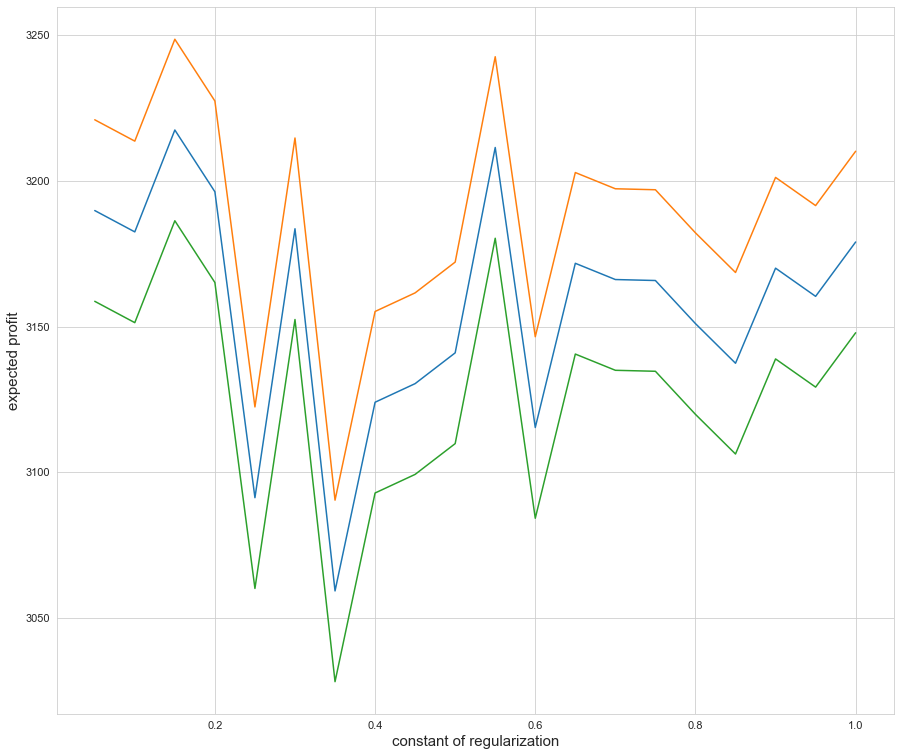

In [867]:
from sklearn.model_selection import KFold
import random
import matplotlib 


param_set = list(np.arange(0.05,1.05,0.05))
seed = 1
np.random.seed(seed)
df = pd.read_csv(f'{DATA_PATH}/bank-additional-full.csv', sep=';')
df['y'].replace({'yes':1, 'no':0}, inplace = True)
# y = (df.y == 'yes').astype(int)
# df.drop(columns={'y'}, inplace = True)

# ohe
ohe_enc = OneHotEncoder()
cat_cols = df.columns[df.dtypes == 'object'].values
noncat_cols = df.columns[df.dtypes != 'object'].values
ohe_enc.fit(df[cat_cols])
cat_ohe_names = list(chain.from_iterable(
    [[f'{col}_{category}' for category in ohe_enc.categories_[i]] for i, col in 
     enumerate(cat_cols)]
))

df = pd.concat([
    df[noncat_cols].reset_index(drop=True),
    pd.DataFrame(ohe_enc.transform(df[cat_cols]).toarray(), 
                 columns=cat_ohe_names)
], axis=1)

# make train and test set using KFold cross validation

kf = KFold(n_splits=5, shuffle=True, random_state=500)

train_indexes = []
test_indexes = []
for train_index, test_index in kf.split(df):
    train_indexes.append(train_index)
    test_indexes.append(test_index)


mean_profits = []
for C in param_set:    
    #1
    test_1 = df.iloc[test_indexes[0], :]
    test_1_y = df.iloc[test_indexes[0], :]['y']
    test_1_x = df.iloc[test_indexes[0], :].drop(columns=['y'])
    train_1 = df.iloc[train_indexes[0], :]
    train_1_y = df.iloc[train_indexes[0], :]['y']
    train_1_x = df.iloc[train_indexes[0], :].drop(columns=['y'])

    model_1 = LogisticRegression(C = C)
    model_1.fit(train_1_x, train_1_y)
    y_pred_1 = model_1.predict(test_1_x)
    
    revenue_1 = np.mean(np.random.uniform(low=0.0, high=20.0,size = test_1_x.shape[0]))*sum((y_pred_1 == test_1_y)&(y_pred_1!=0))
    profit_1 = revenue_1 - sum(y_pred_1)

    #2
    test_2 = df.iloc[test_indexes[1], :]
    test_2_y = df.iloc[test_indexes[1], :]['y']
    test_2_x = df.iloc[test_indexes[1], :].drop(columns=['y'])
    train_2 = df.iloc[train_indexes[1], :]
    train_2_y = df.iloc[train_indexes[1], :]['y']
    train_2_x = df.iloc[train_indexes[1], :].drop(columns=['y'])

    model_2 = LogisticRegression(C = C)
    model_2.fit(train_2_x, train_2_y)
    y_pred_2 = model_2.predict(test_2_x)
    revenue_2 = np.mean(np.random.uniform(low=0.0, high=20.0,size = test_2_x.shape[0]))*sum((y_pred_2 == test_2_y)&(y_pred_2 != 0))
    profit_2 = revenue_2 - sum(y_pred_2)

    #3
    test_3 = df.iloc[test_indexes[2], :]
    test_3_y = df.iloc[test_indexes[2], :]['y']
    test_3_x = df.iloc[test_indexes[2], :].drop(columns=['y'])
    train_3 = df.iloc[train_indexes[2], :]
    train_3_y = df.iloc[train_indexes[2], :]['y']
    train_3_x = df.iloc[train_indexes[2], :].drop(columns=['y'])

    model_3 = LogisticRegression(C = C)
    model_3.fit(train_3_x, train_3_y)
    y_pred_3 = model_3.predict(test_3_x)
    revenue_3 = np.mean(np.random.uniform(low=0.0, high=20.0,size = test_3_x.shape[0]))*sum((y_pred_3 == test_3_y)&(y_pred_3 != 0))
    profit_3 = revenue_3 - sum(y_pred_3)

    #4
    test_4 = df.iloc[test_indexes[3], :]
    test_4_y = df.iloc[test_indexes[3], :]['y']
    test_4_x = df.iloc[test_indexes[3], :].drop(columns=['y'])
    train_4 = df.iloc[train_indexes[3], :]
    train_4_y = df.iloc[train_indexes[3], :]['y']
    train_4_x = df.iloc[train_indexes[3], :].drop(columns=['y'])

    model_4 = LogisticRegression(C = C)
    model_4.fit(train_4_x, train_4_y)
    y_pred_4 = model_4.predict(test_4_x)
    revenue_4 = np.mean(np.random.uniform(low=0.0, high=20.0,size = test_4_x.shape[0]))*sum((y_pred_4 == test_4_y)&(y_pred_4 != 0))
    profit_4 = revenue_4 - sum(y_pred_4)

    #5
    test_5 = df.iloc[test_indexes[4], :]
    test_5_y = df.iloc[test_indexes[4], :]['y']
    test_5_x = df.iloc[test_indexes[4], :].drop(columns=['y'])
    train_5 = df.iloc[train_indexes[4], :]
    train_5_y = df.iloc[train_indexes[4], :]['y']
    train_5_x = df.iloc[train_indexes[4], :].drop(columns=['y'])

    model_5 = LogisticRegression(C = C)
    model_5.fit(train_5_x, train_5_y)
    y_pred_5 = model_5.predict(test_5_x)
    revenue_5 = np.mean(np.random.uniform(low=0.0, high=20.0,size = test_5_x.shape[0]))*sum((y_pred_5 == test_5_y)&(y_pred_5 != 0))
    profit_5 = revenue_5 - sum(y_pred_5)


    mean_revenue = np.mean([revenue_1, revenue_2, revenue_3, revenue_4, revenue_5])
    std_revenue = np.std([revenue_1, revenue_2, revenue_3, revenue_4, revenue_5])
    mean_profit = np.mean([profit_1, profit_2, profit_3, profit_4, profit_5])
    mean_costs = np.mean([revenue_1 - profit_1, revenue_2 - profit_2, revenue_3 - profit_3,
                          revenue_4 - profit_4, revenue_5 - profit_5])
    mean_profits.append(mean_profit)  


data = pd.DataFrame(mean_profits, param_set)
data_plus_std = pd.DataFrame(mean_profits+std_revenue, param_set)
data_minus_std = pd.DataFrame(mean_profits-std_revenue, param_set)


matplotlib.rc('xtick', labelsize=11) 
matplotlib.rc('ytick', labelsize=11)
plt.figure(figsize=(15,13))

plt.plot(data);
plt.plot(data_plus_std);
plt.plot(data_minus_std);
plt.xlabel('constant of regularization', fontsize = 15)
plt.ylabel('expected profit', fontsize = 15)



Постройте график зависимости прибыли от порога бинаризации, также отметьте на нем стандартные отклонения. Выделите наилучший порог. 


__Вопрос:__ Замечаете ли вы какую-то закономерность? Для правильного ответа на этот вопрос попробуйте запустить несколько раз и задумайтесь, почему порог получается в какой-то конкретной области?

Закономерность сосоит в том, что ожидаемая рибыль максимальна при константе регауляризации, находящейся между 0.5 и 0.6,
а также меньшей 0.2, но результаты нестабильны
Я показал выше, что при константе 0.06 ожидаемая прибыль максимальна

Каковы значения precision и recall на выбранном пороге? Оцените по кросс-валидации. Также вычислите стандартное отклонение.

In [889]:
# выберем значение, которое ближе к половине , так как меняя seed оно чаще приводило к бОльшим значениям ожидаемой прибыли
pd.DataFrame([mean_profits, param_set]).T.rename({0:'profit', 1:'reg_contant'}, axis=1).sort_values('profit', ascending=False).head(3)



,profit,reg_contant
5,3258.416785,0.06
51,3249.791875,0.52
41,3246.759446,0.42


In [885]:
mean_precision = np.mean(cross_val_score(LogisticRegression(C = 0.52), df, y, cv=kf, scoring = 'precision'))
std_precision = np.std(cross_val_score(LogisticRegression(C = 0.52), df, y, cv=kf, scoring = 'precision'))
mean_recall = np.mean(cross_val_score(LogisticRegression(C = 0.52), df, y, cv=kf, scoring = 'recall'))
std_recall = np.std(cross_val_score(LogisticRegression(C = 0.52), df, y, cv=kf, scoring = 'recall'))

In [886]:
mean_precision, std_precision

(0.8833801796209644, 0.08967992966481902)

In [887]:
mean_recall, std_recall

(0.8452609463557652, 0.198806459481406)

Как вы, вероятно, уже поняли, ваша модель склоняется к более высокому recall. Попробуйте оценить качество модели с помощью `PR-AUC` в зоне recall $\geq$ 0.5. Сделайте это следующим образом - выберите только те пороги, на которых достигается необходимый recall, затем интерпретируйте отсеченный в единичном квадрате прямоугольник как новый единичный квадрат и посчитайте площадь под отсеченной кривой. 

In [892]:
param_set = list(np.arange(0.01,1.01,0.01))

appropriate_constants = []
for threshold in param_set:
    certain_recall = np.mean(cross_val_score(LogisticRegression(C = threshold), df, y, cv=kf, scoring = 'recall'))
    if certain_recall > 0.5:
        appropriate_constants.append(threshold)

In [893]:
appropriate_constants

[0.01,
 0.02,
 0.03,
 0.04,
 0.05,
 0.060000000000000005,
 0.06999999999999999,
 0.08,
 0.09,
 0.11,
 0.12,
 0.13,
 0.14,
 0.15000000000000002,
 0.16,
 0.17,
 0.18000000000000002,
 0.19,
 0.2,
 0.22,
 0.23,
 0.24000000000000002,
 0.25,
 0.26,
 0.27,
 0.28,
 0.29000000000000004,
 0.3,
 0.31,
 0.32,
 0.33,
 0.34,
 0.35000000000000003,
 0.36000000000000004,
 0.37,
 0.38,
 0.39,
 0.4,
 0.41000000000000003,
 0.42000000000000004,
 0.43,
 0.44,
 0.45,
 0.46,
 0.47000000000000003,
 0.48000000000000004,
 0.49,
 0.5,
 0.51,
 0.52,
 0.53,
 0.54,
 0.55,
 0.56,
 0.5700000000000001,
 0.5800000000000001,
 0.59,
 0.6,
 0.61,
 0.62,
 0.63,
 0.64,
 0.65,
 0.66,
 0.68,
 0.6900000000000001,
 0.7000000000000001,
 0.7100000000000001,
 0.72,
 0.73,
 0.74,
 0.75,
 0.76,
 0.77,
 0.78,
 0.79,
 0.8,
 0.81,
 0.8200000000000001,
 0.8300000000000001,
 0.8400000000000001,
 0.85,
 0.86,
 0.87,
 0.88,
 0.89,
 0.9,
 0.91,
 0.92,
 0.93,
 0.9400000000000001,
 0.9500000000000001,
 0.9600000000000001,
 0.97,
 0.98,
 0.99,


In [894]:
len(appropriate_constants)

97

практически при всех значениях такой recall достигается